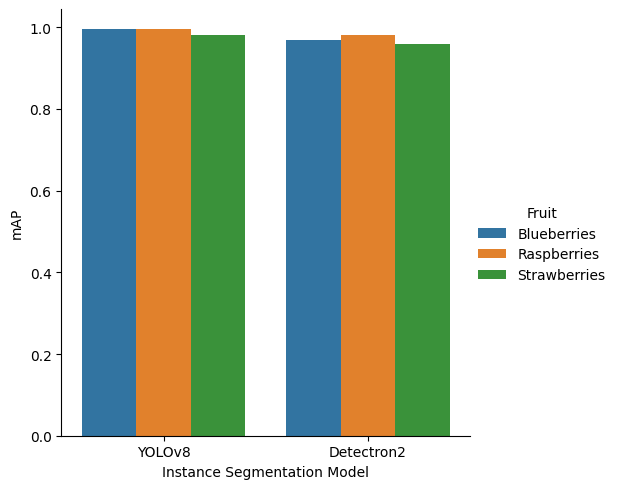

In [4]:
# create a sample dataframe
df = pd.DataFrame({'Instance Segmentation Model': ['YOLOv8', 'YOLOv8', 'YOLOv8', 'Detectron2', 'Detectron2', 'Detectron2'],
                   'mAP': [0.995, 0.995, 0.982, 0.97, 0.98, 0.96],
                   'Fruit': ['Blueberries', 'Raspberries', 'Strawberries', 'Blueberries', 'Raspberries', 'Strawberries']})

# create a catplot
sns.catplot(x='Instance Segmentation Model', y='mAP', hue='Fruit', data=df, kind='bar')

In [5]:
import json

resultsCNN = {}
resultsML = {}
resultsDL = {}


with open('resultsCNNAll.json') as json_file:
    resultsCNN = json.load(json_file)

with open('resultsDeepLearningC.json') as json_file:
    resultsDL = json.load(json_file)

with open('resultsMachineLearning.json') as json_file:
    resultsML = json.load(json_file)

#print(json.dumps(resultsCNN, indent=1))
print(json.dumps(resultsDL, indent=1))
print(json.dumps(resultsML, indent=1))



{
 "Raw": {
  "DeepLearning": {
   "CGBR": {
    "MLP": {
     "100": {
      "r2": -64.701839859492,
      "loss": 18.549575805664062,
      "mse": 18.549575805664062,
      "mae": 4.2672224044799805,
      "rmse": 4.30692195892334
     },
     "500": {
      "r2": -119.53302798603754,
      "loss": 85.44715881347656,
      "mse": 85.44715881347656,
      "mae": 9.205338478088379,
      "rmse": 9.243762969970703
     }
    },
    "FCNN": {
     "100": {
      "r2": -5.38604791020252,
      "loss": 2.576350450515747,
      "mse": 2.576350450515747,
      "mae": 1.3141248226165771,
      "rmse": 1.6051013469696045
     },
     "500": {
      "r2": -4.810571955260061,
      "loss": 2.7025272846221924,
      "mse": 2.7025272846221924,
      "mae": 1.357565999031067,
      "rmse": 1.6439365148544312
     }
    },
    "DeepSVM": {
     "100": {
      "r2": -4.055664748611606,
      "loss": 2.6975085735321045,
      "mse": 2.6625924110412598,
      "mae": 1.2837483882904053,
      "rmse": 1.

In [102]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap6(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            #print(dataset_name)
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })
    print(r2_data)

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(x,y)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'))
    ax.set_title("R2 Comparison by Model and Epochs")
    
    # Set the xlabel based on the epoch number
    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        ax.set_xlabel("Model and Epochs")
    else:
        ax.set_xlabel("Model")
    
    ax.set_ylabel("Segmentation model and Data features")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap7(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2 values

    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            #print(dataset_name)
                            data.append([dataset_name + '-' +  model_name + '-' + epoch, epoch_data['r2']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })
    #print(r2_data)

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(x,y)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'))
    ax.set_title("R2 Comparison by Model and Epochs")
    
    # Set the xlabel based on the epoch number
    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        ax.set_xlabel("Model and Epochs")
    else:
        ax.set_xlabel("Model")
    
    ax.set_ylabel("Segmentation model and Data features")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    return data


  experiment        test_name dataset_name model_name epoch        r2  r2_rank
0        Raw  MachineLearning         CGBR     linear     1  0.985326      6.0
1        Raw  MachineLearning         CGBR        SVR     1  0.977957      2.0
2       YOLO  MachineLearning         CGBY     linear     1  0.982495      4.0


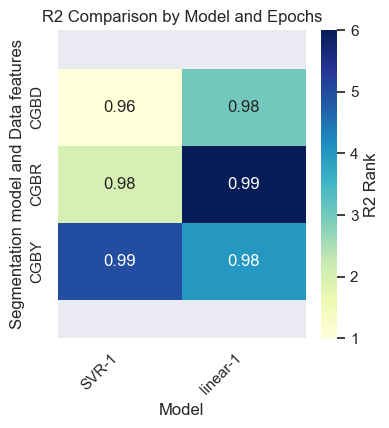

In [4]:
lista = plot_r2_heatmap7(resultsML, 'B', 4,4)


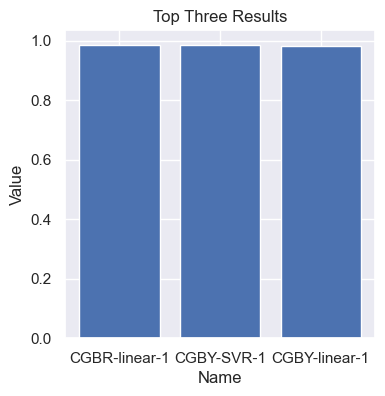

In [13]:
import matplotlib.pyplot as plt

sorted_data = sorted(lista, key=lambda x: x[1], reverse=True)



# Extract the top three results
top_three = sorted_data[:3]

# Separate the names and values for plotting
names = [item[0] for item in top_three]
values = [item[1] for item in top_three]

# Create a bar plot
plt.bar(names, values)
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Top Three Results')
plt.show()


In [55]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap5(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():

                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            #print(dataset_name)
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(6,3)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'))
    ax.set_title("R2 Comparison by Model and Epochs")
    ax.set_xlabel("Model and Epochs")
    ax.set_ylabel("Segmentation model and Data features")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [34]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap4(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            #print(dataset_name)
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,12)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'})
    ax.set_title("R2 Comparison by Model and Epochs")
    ax.set_xlabel("Model and Epochs")
    ax.set_ylabel("Experiment and Data features")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


 ARD
 CGRD
 CRD
 FRD
 ARR
 CGRR
 CRR
 FRR
 ARY
 CGRY
 CRY
 FRY
['(Detectron2, DeepLearning, ARD)', '(Detectron2, DeepLearning, CGRD)', '(Detectron2, DeepLearning, CRD)', '(Detectron2, DeepLearning, FRD)', '(Raw, DeepLearning, ARR)', '(Raw, DeepLearning, CGRR)', '(Raw, DeepLearning, CRR)', '(Raw, DeepLearning, FRR)', '(YOLO, DeepLearning, ARY)', '(YOLO, DeepLearning, CGRY)', '(YOLO, DeepLearning, CRY)', '(YOLO, DeepLearning, FRY)']
 ARD
 CGRD
 CRD
 FRD
 ARR
 CGRR
 CRR
 FRR
 ARY
 CGRY
 CRY
 FRY
['(Detectron2, DeepLearning, ARD)', '(Detectron2, DeepLearning, CGRD)', '(Detectron2, DeepLearning, CRD)', '(Detectron2, DeepLearning, FRD)', '(Raw, DeepLearning, ARR)', '(Raw, DeepLearning, CGRR)', '(Raw, DeepLearning, CRR)', '(Raw, DeepLearning, FRR)', '(YOLO, DeepLearning, ARY)', '(YOLO, DeepLearning, CGRY)', '(YOLO, DeepLearning, CRY)', '(YOLO, DeepLearning, FRY)']
 ARD
 CGRD
 CRD
 FRD
 ARR
 CGRR
 CRR
 FRR
 ARY
 CGRY
 CRY
 FRY
['(Detectron2, DeepLearning, ARD)', '(Detectron2, DeepLearning, CGR

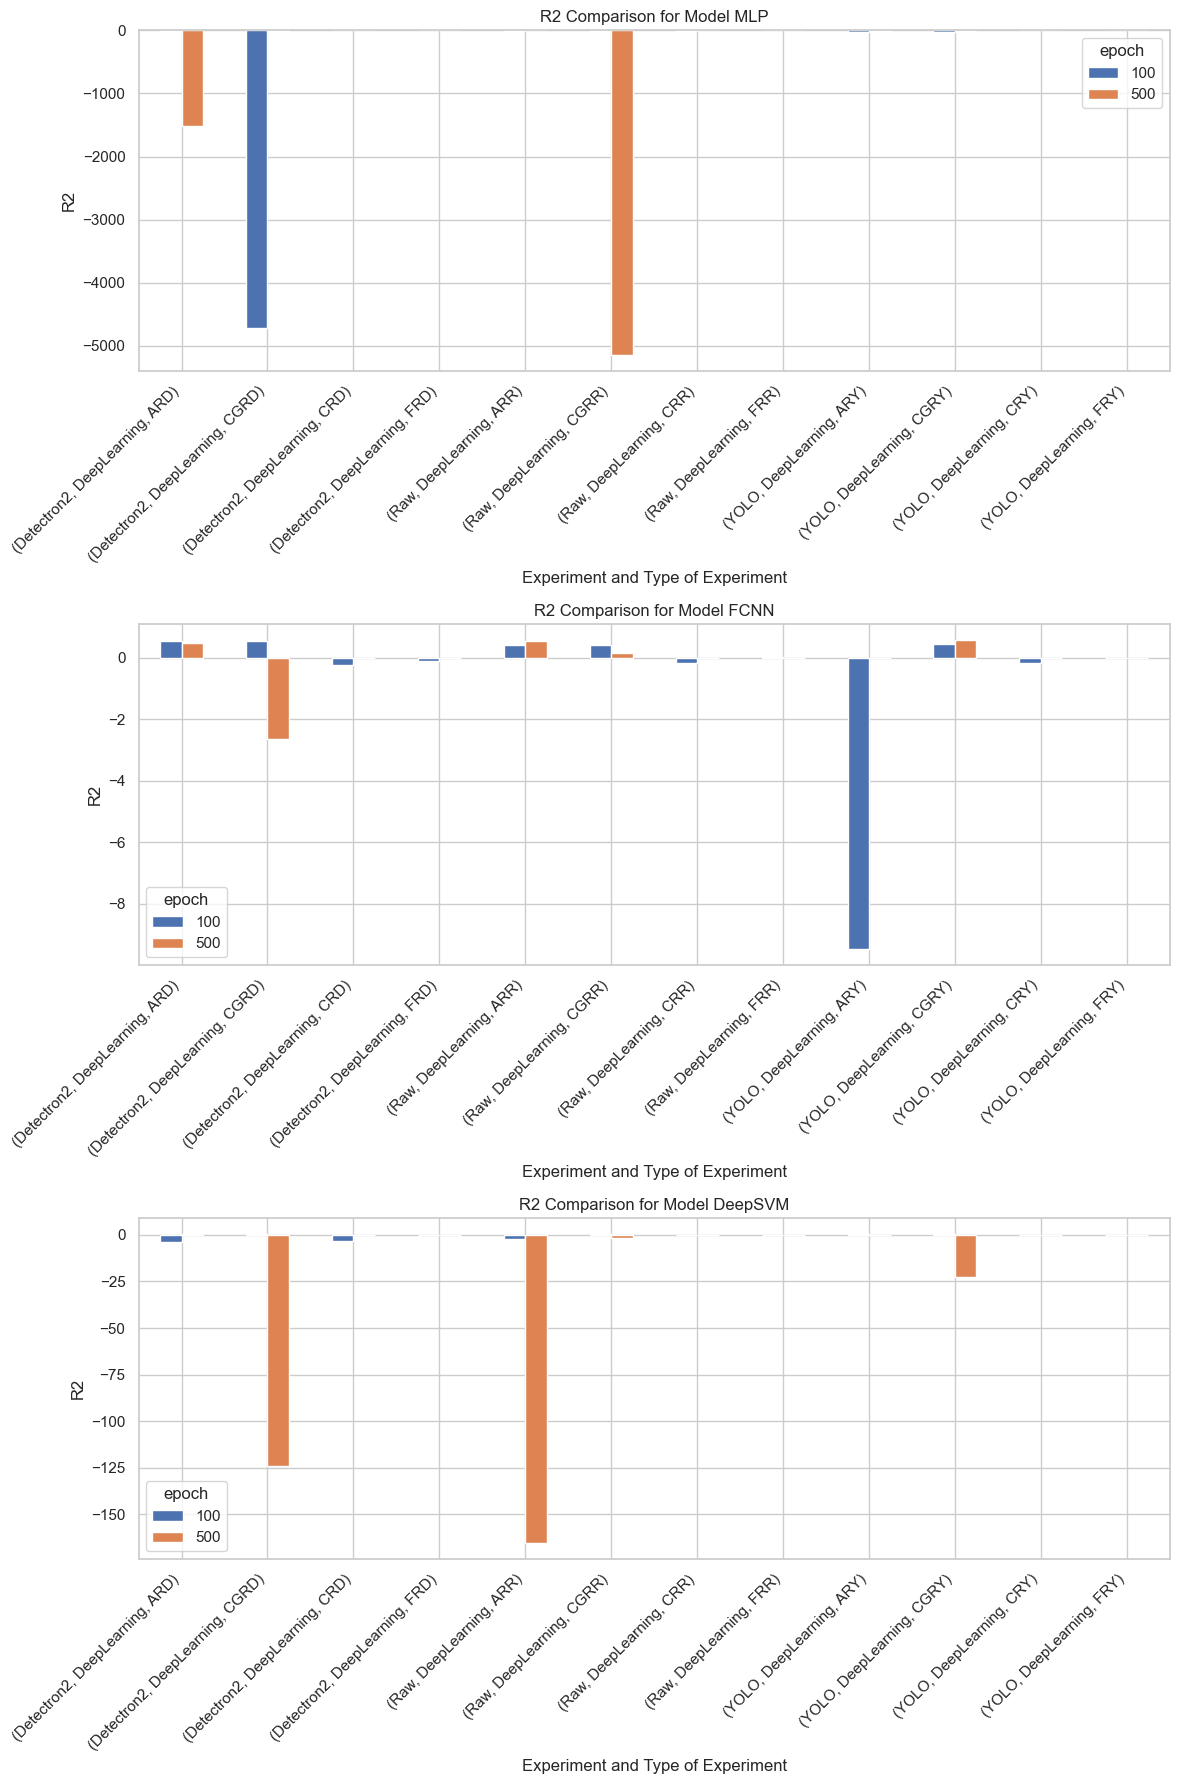

In [81]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_r2_barplot2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Get the unique model names
    unique_models = r2_df['model_name'].unique()

    # Create subplots for each model
    fig, axs = plt.subplots(len(unique_models), figsize=(12, 6 * len(unique_models)))

    for idx, model_name in enumerate(unique_models):
        # Filter data for the current model
        model_data = r2_df[r2_df['model_name'] == model_name]

        # Create a pivot table with the R2 values
        pivot_table_r2 = pd.pivot_table(model_data, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['epoch'])

        # Create the bar plot
        ax = axs[idx]
        pivot_table_r2.plot.bar(ax=ax)

        # Set the title and labels
        ax.set_title(f"R2 Comparison for Model {model_name}")
        ax.set_xlabel("Experiment and Type of Experiment")
        ax.set_ylabel("R2")

        # Rotate the x-axis labels to improve readability
        for elem in ax.get_xticklabels():
            text = elem.get_text().split(',')[2]
            newtext = text[0:len(text) - 1]
            print(newtext)

        new_ticks = [i.get_text() for i in ax.get_xticklabels()]
        print(new_ticks)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
 


    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your results_dict and fruitInitial
# plot_r2_barplots(results_dict, fruitInitial)
plot_r2_barplot2(resultsDL, 'R')

  experiment     test_name dataset_name model_name epoch           r2
0        Raw  DeepLearning         CGRR        MLP   100    -5.561486
1        Raw  DeepLearning         CGRR        MLP   500 -5140.528238
2        Raw  DeepLearning         CGRR       FCNN   100     0.418348
3        Raw  DeepLearning         CGRR       FCNN   500     0.156057
4        Raw  DeepLearning         CGRR    DeepSVM   100     0.392031
5        Raw  DeepLearning         CGRR    DeepSVM   500    -1.972650
6        Raw  DeepLearning          FRR        MLP   100    -0.102549
7        Raw  DeepLearning          FRR        MLP   500    -0.049772
8        Raw  DeepLearning          FRR       FCNN   100     0.015374
9        Raw  DeepLearning          FRR       FCNN   500    -0.006273


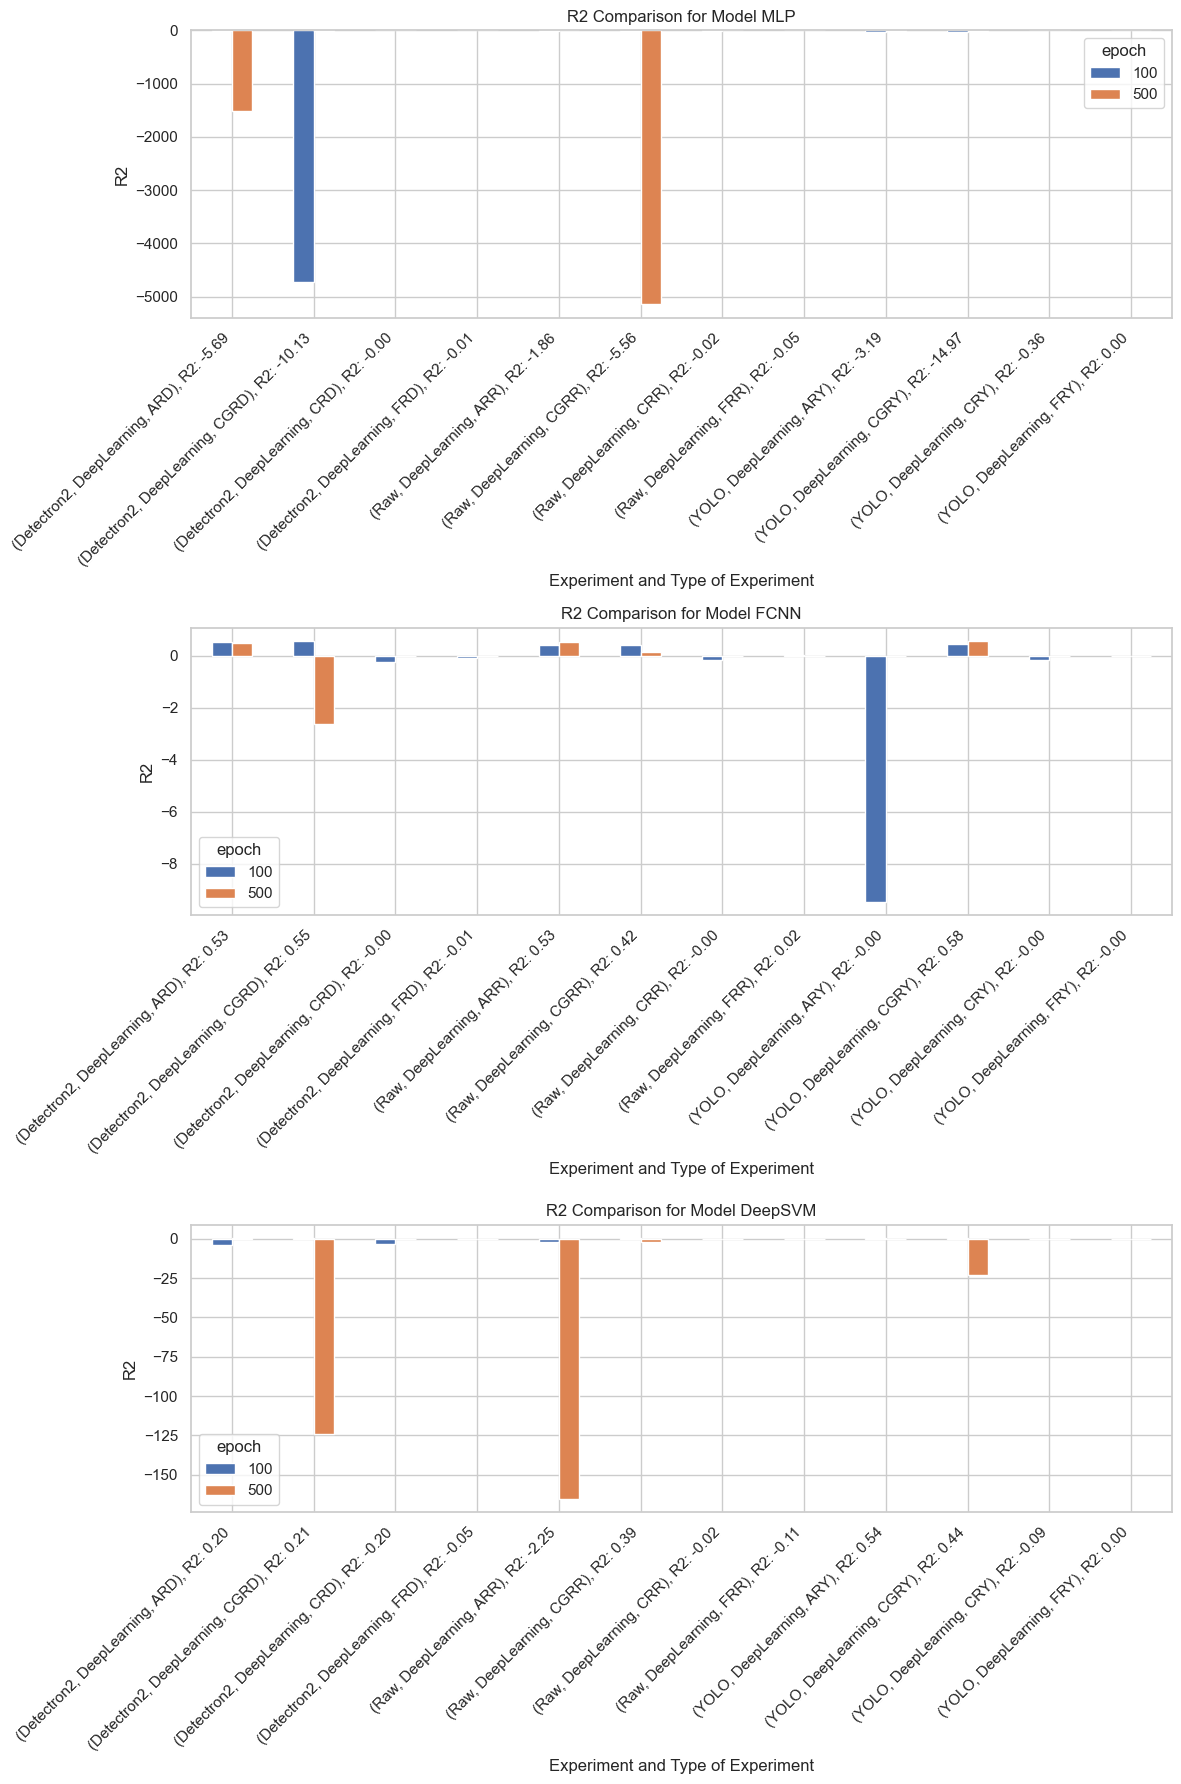

In [83]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_r2_barplot2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)
    print(r2_df.head(10))

    # Get the unique model names
    unique_models = r2_df['model_name'].unique()

    # Create subplots for each model
    fig, axs = plt.subplots(len(unique_models), figsize=(12, 6 * len(unique_models)))

    for idx, model_name in enumerate(unique_models):
        # Filter data for the current model
        model_data = r2_df[r2_df['model_name'] == model_name]

        # Create a pivot table with the R2 values
        pivot_table_r2 = pd.pivot_table(model_data, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['epoch'])

        # Create the bar plot
        ax = axs[idx]
        pivot_table_r2.plot.bar(ax=ax)

        # Set the title and labels
        ax.set_title(f"R2 Comparison for Model {model_name}")
        ax.set_xlabel("Experiment and Type of Experiment")
        ax.set_ylabel("R2")

        # Update the x-tick labels to include y values
        new_labels = []
        for elem, value in zip(ax.get_xticklabels(), pivot_table_r2.max(axis=1)):
            text = elem.get_text()
            new_labels.append(f"{text}, R2: {value:.2f}")

        ax.set_xticklabels(new_labels, rotation=45, horizontalalignment='right')

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your results_dict and fruitInitial
# plot_r2_barplots(results_dict, fruitInitial)
plot_r2_barplot2(resultsDL, 'R')


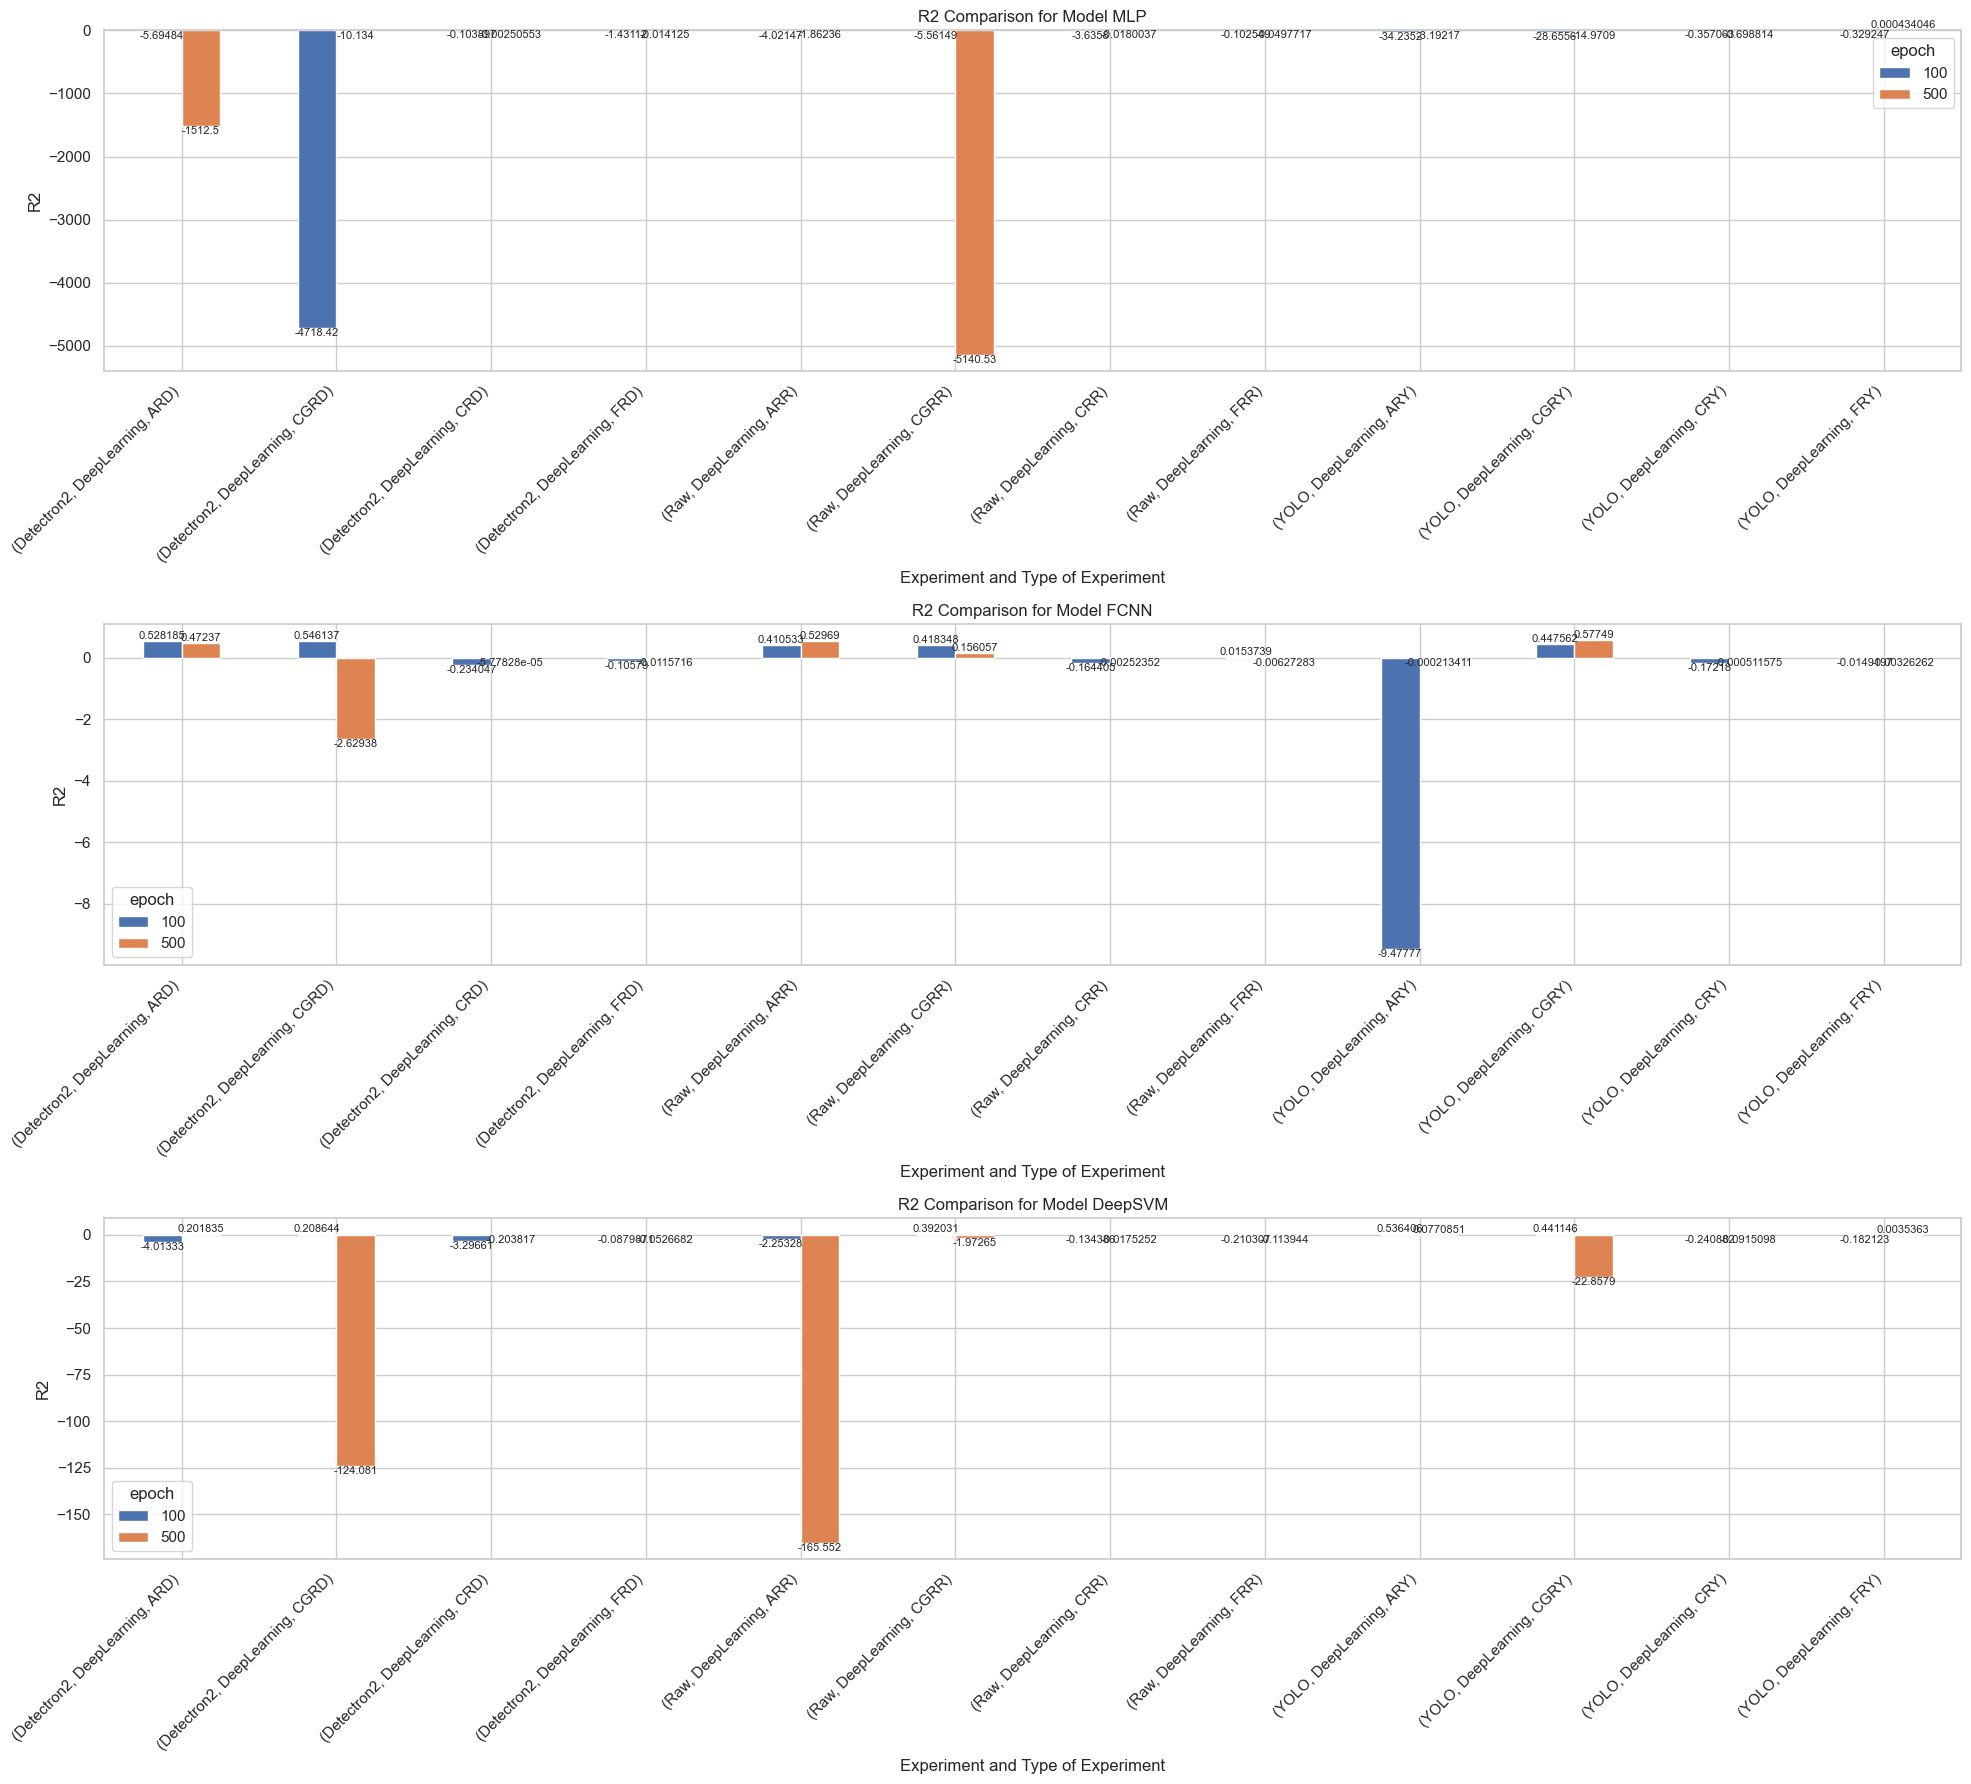

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_r2_barplot2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Get the unique model names
    unique_models = r2_df['model_name'].unique()

    # Create subplots for each model
    fig, axs = plt.subplots(len(unique_models), figsize=(20, 6 * len(unique_models)))

    # If there is only one model, wrap the axs variable in a list
    if len(unique_models) == 1:
        axs = [axs]

    for idx, model_name in enumerate(unique_models):
        # Filter data for the current model
        model_data = r2_df[r2_df['model_name'] == model_name]

        # Create a pivot table with the R2 values
        pivot_table_r2 = pd.pivot_table(model_data, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['epoch'])

        # Create the bar plot
        ax = axs[idx]
        pivot_table_r2.plot.bar(ax=ax)

        # Set the title and labels
        ax.set_title(f"R2 Comparison for Model {model_name}")
        ax.set_xlabel("Experiment and Type of Experiment")
        ax.set_ylabel("R2")

        # Rotate the x-axis labels to improve readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Add value labels on top of the bars
        for container in ax.containers:
            ax.bar_label(container, fontsize=8)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your results_dict and fruitInitial
# plot_r2_barplots(results_dict, fruitInitial)

# Call the function with your results_dict and fruitInitial
# plot_r2_barplots(results_dict, fruitInitial)
plot_r2_barplot2(resultsDL, 'R')


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_r2_bar_charts(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)
    r2_df['exp_test_dataset'] = r2_df['experiment'] + ' - ' + r2_df['test_name'] + ' - ' + r2_df['dataset_name']
    r2_df['model_epoch'] = r2_df['model_name'] + ' - Epoch ' + r2_df['epoch'].astype(str)

    # Generate the subplots for each model-epoch combination
    unique_models_epochs = r2_df['model_epoch'].unique()
    fig, axes = plt.subplots(len(unique_models_epochs), 1, figsize=(8, 5 * len(unique_models_epochs)), sharex=True)

    for idx, (model_epoch, ax) in enumerate(zip(unique_models_epochs, axes)):
        plot_data = r2_df[r2_df['model_epoch'] == model_epoch]
        sns.barplot(x='exp_test_dataset', y='r2', data=plot_data, palette='mako_r', ax=ax)
        ax.set_ylabel(model_epoch)
        ax.set_xlabel("")

        # Add the values on top of each bar
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}",
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, fontweight='bold')

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Call the function with your results_dict and fruitInitial


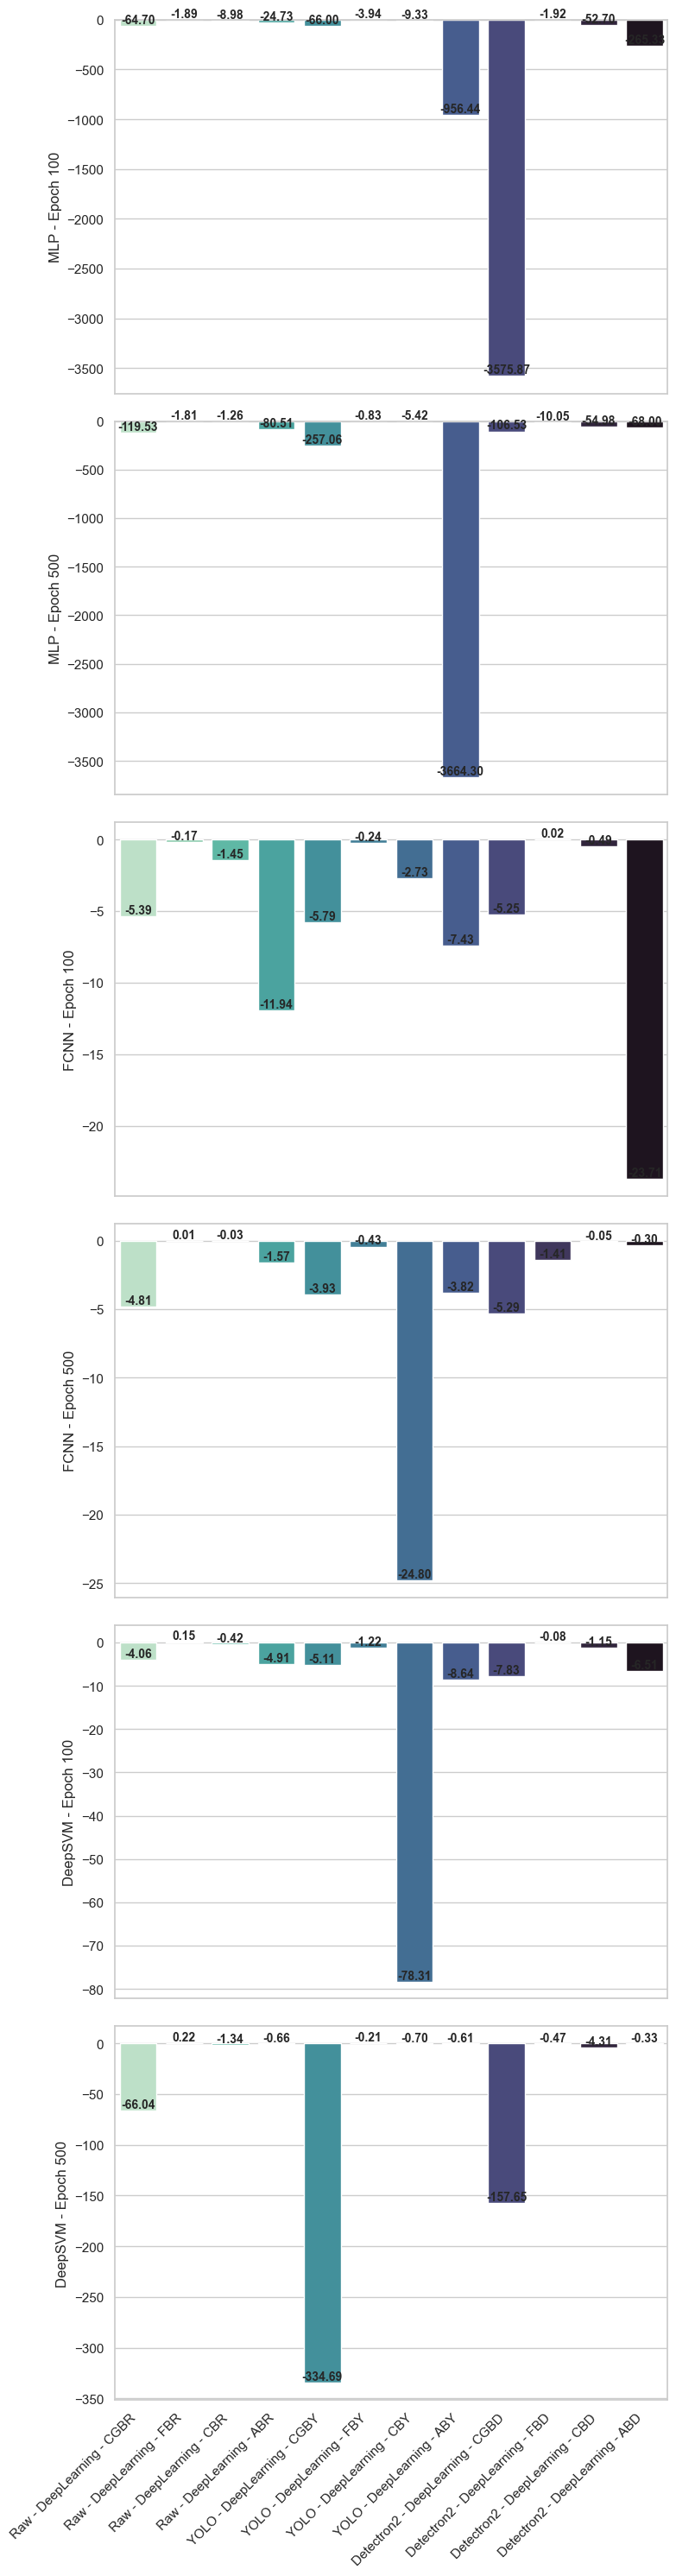

In [42]:
plot_r2_bar_charts(resultsDL, 'B')

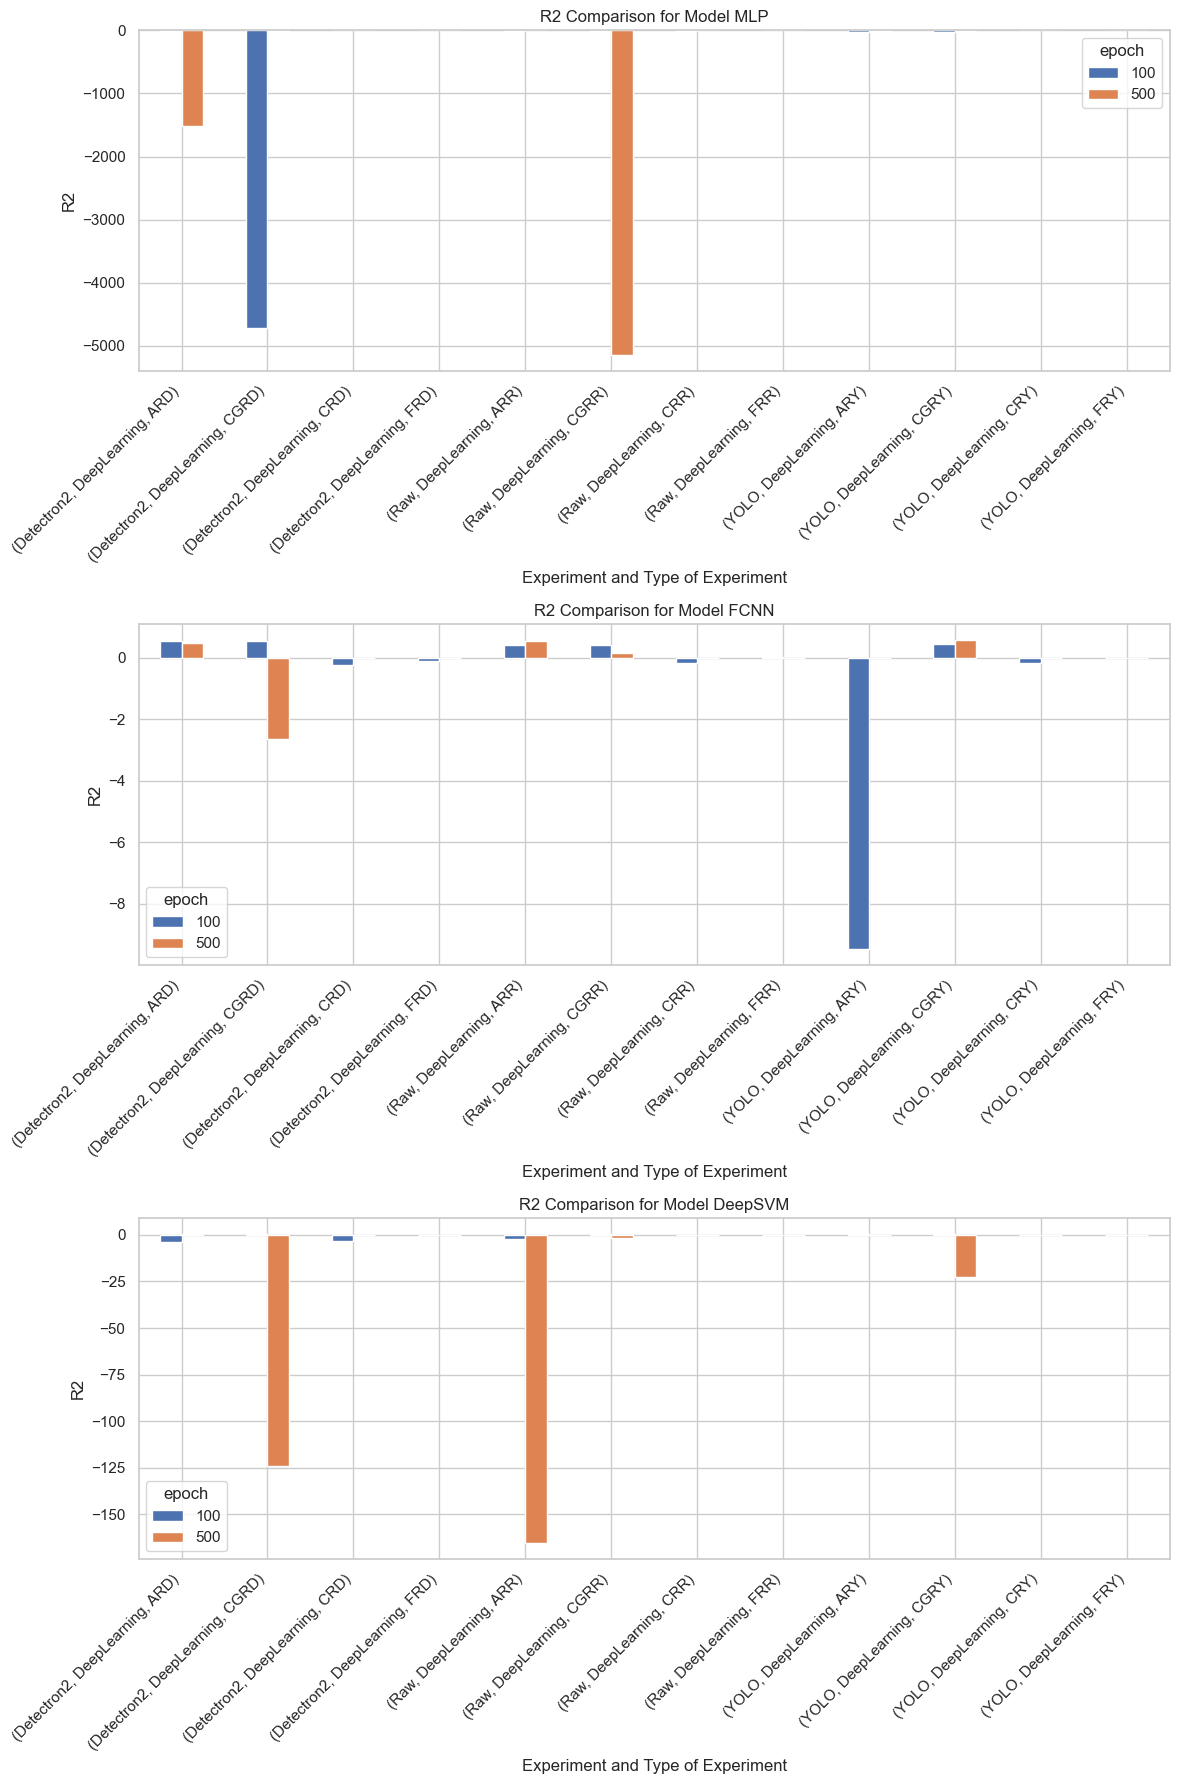

In [57]:
plot_r2_barplot2(resultsDL, 'R')


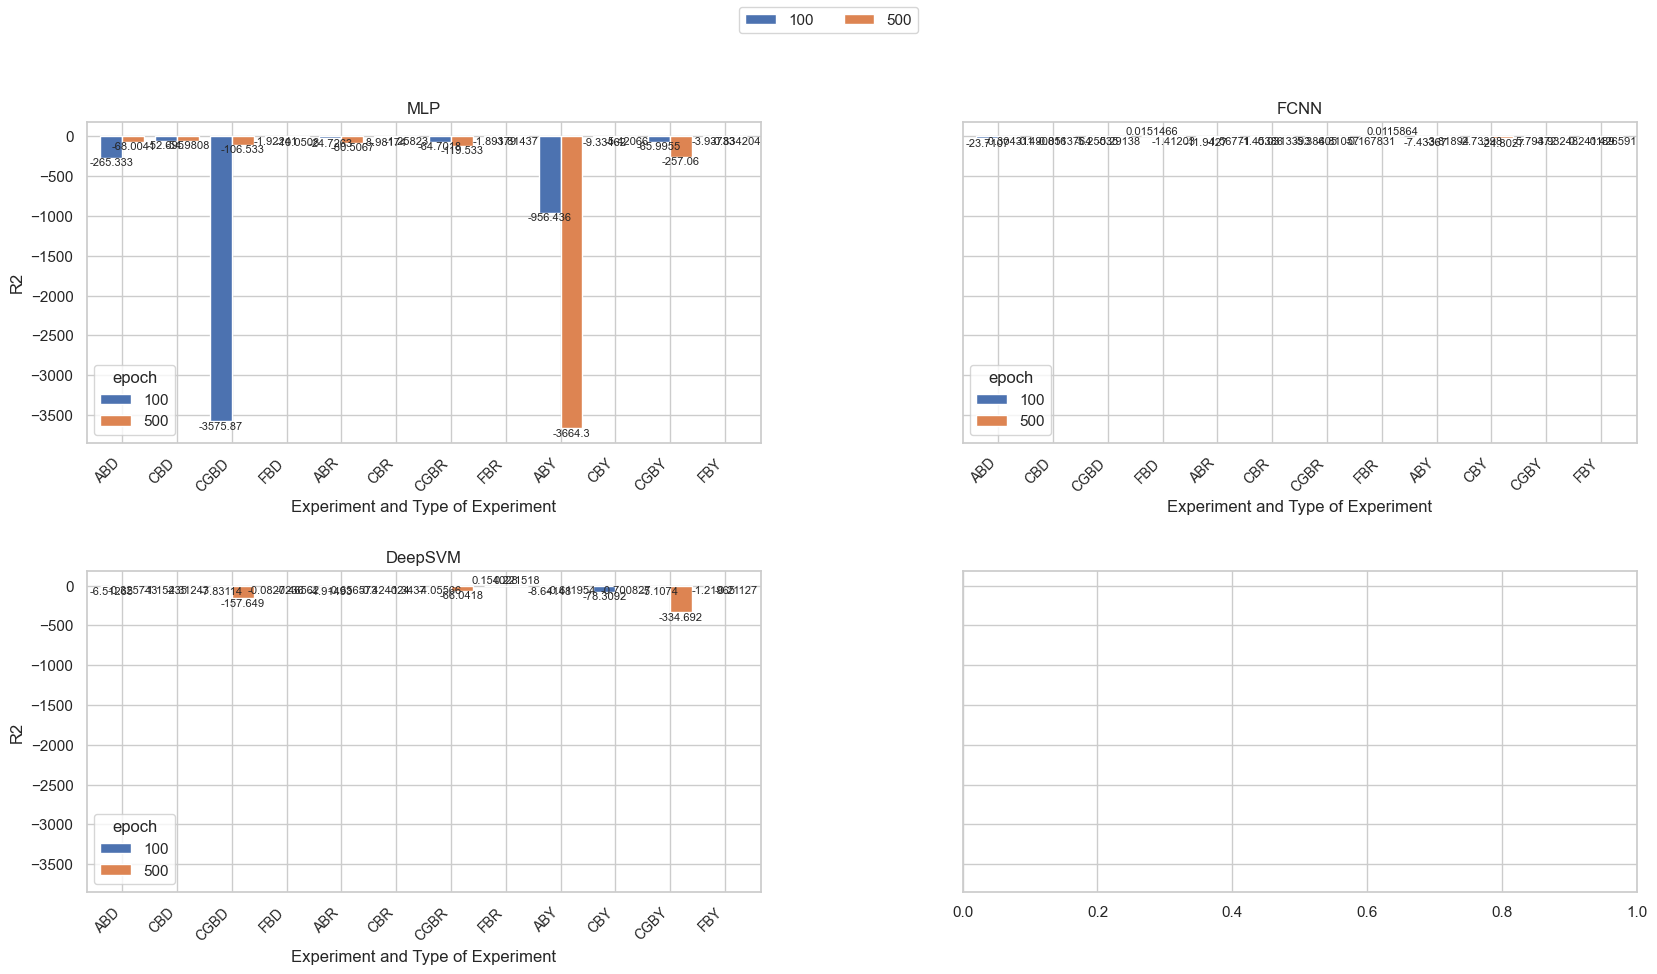

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_bars(r2_data):
    r2_df = pd.DataFrame(r2_data)
    model_names = r2_df['model_name'].unique()
    num_models = len(model_names)
    num_columns = 2
    num_rows = int(np.ceil(num_models / num_columns))

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows), sharey=True)
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    for i, model_name in enumerate(model_names):
        ax = axes[i // num_columns, i % num_columns]
        model_data = r2_df[r2_df['model_name'] == model_name]
        model_pivot = pd.pivot_table(model_data, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['epoch']).reset_index()

        model_pivot.plot(kind='bar', ax=ax, width=0.8)

        ax.set_title(model_name)
        ax.set_xlabel('Experiment and Type of Experiment')
        ax.set_ylabel('R2')
        ax.set_xticklabels(model_pivot['dataset_name'], fontsize=10, rotation=45, horizontalalignment='right')

        # Add value labels on top of the bars
        for container in ax.containers:
            ax.bar_label(container, fontsize=8)

    # Add a legend to the plot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(labels))

    plt.show()

# Usage example:
r2_data = prepare_dataframe(resultsDL, 'B')
plot_r2_bars(r2_data)


  experiment        test_name dataset_name model_name epoch        r2  r2_rank
0        Raw  MachineLearning         CGBR     linear     1  0.985326      6.0
1        Raw  MachineLearning         CGBR        SVR     1  0.977957      2.0
2       YOLO  MachineLearning         CGBY     linear     1  0.982495      4.0


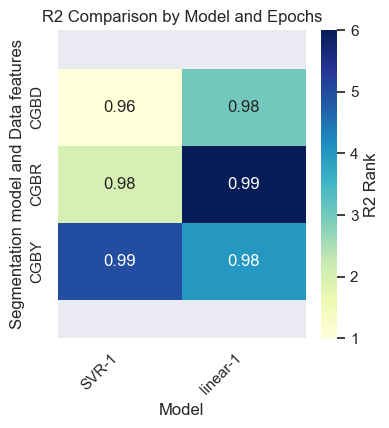

In [5]:
mlB = plot_r2_heatmap7(resultsML, 'B', 4,4)



  experiment        test_name dataset_name model_name epoch        r2  r2_rank
0        Raw  MachineLearning         CGSR     linear     1  0.921792      2.0
1        Raw  MachineLearning         CGSR        SVR     1  0.963203      6.0
2       YOLO  MachineLearning         CGSY     linear     1  0.959239      5.0


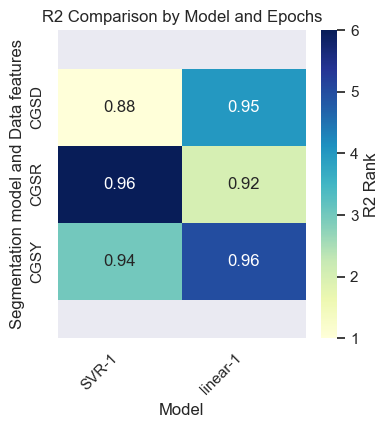

In [6]:
mlS = plot_r2_heatmap7(resultsML, 'S', 4,4)

  experiment        test_name dataset_name model_name epoch        r2  r2_rank
0        Raw  MachineLearning         CGRR     linear     1  0.485427      2.0
1        Raw  MachineLearning         CGRR        SVR     1  0.572087      5.0
2       YOLO  MachineLearning         CGRY     linear     1  0.499399      3.0


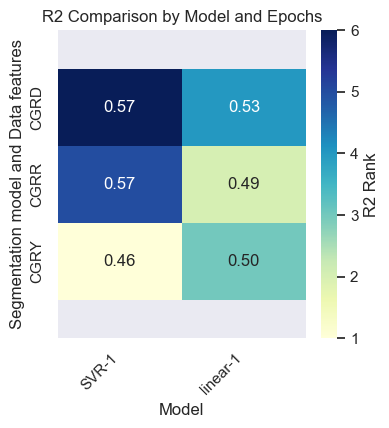

In [7]:
mlR = plot_r2_heatmap7(resultsML, 'R', 4,4)


  experiment     test_name dataset_name model_name epoch          r2  r2_rank
0        Raw  DeepLearning         CGBR        MLP   100  -64.701840     15.0
1        Raw  DeepLearning         CGBR        MLP   500 -119.533028      8.0
2        Raw  DeepLearning         CGBR       FCNN   100   -5.386048     31.0


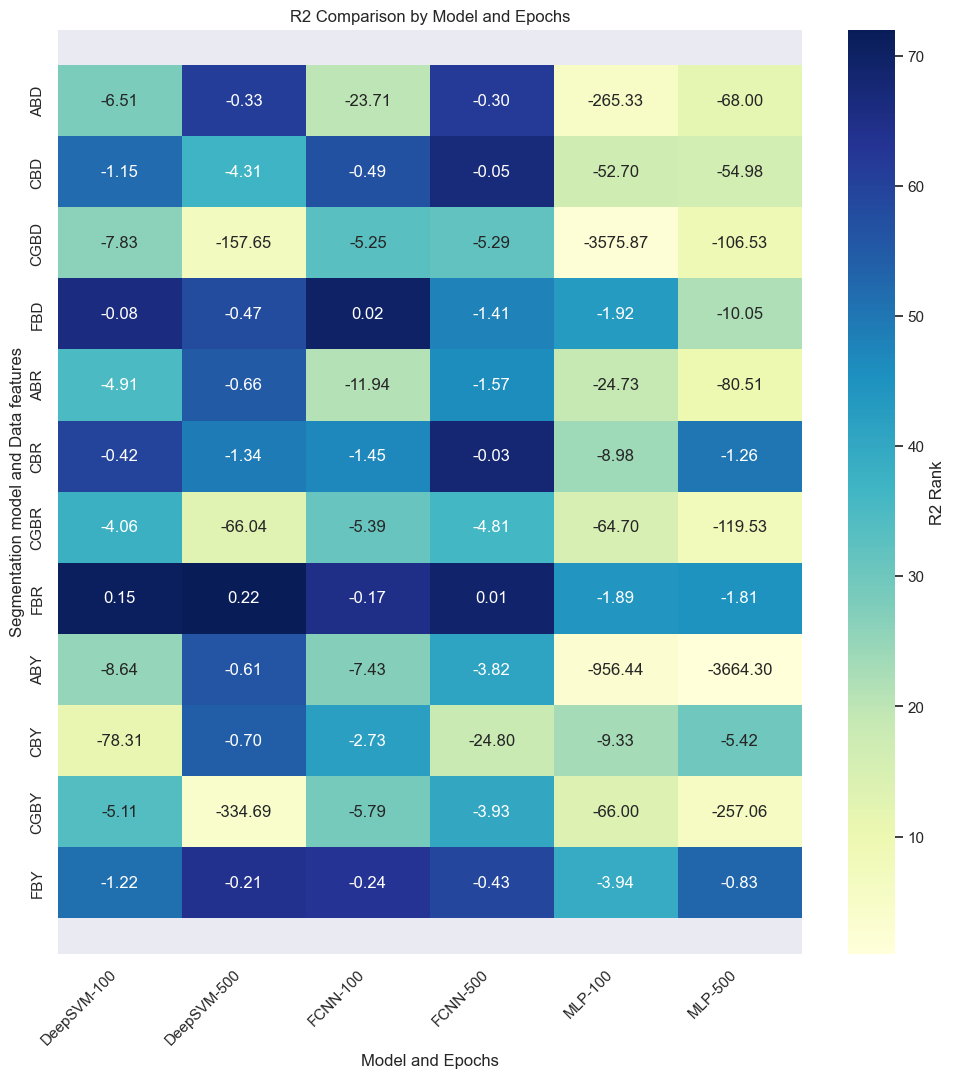

In [8]:
dlB = plot_r2_heatmap7(resultsDL, 'B', 12, 12)


  experiment     test_name dataset_name model_name epoch        r2  r2_rank
0        Raw  DeepLearning         CGSR        MLP   100 -0.073272     28.0
1        Raw  DeepLearning         CGSR        MLP   500  0.207442     54.0
2        Raw  DeepLearning         CGSR       FCNN   100  0.952713     70.0


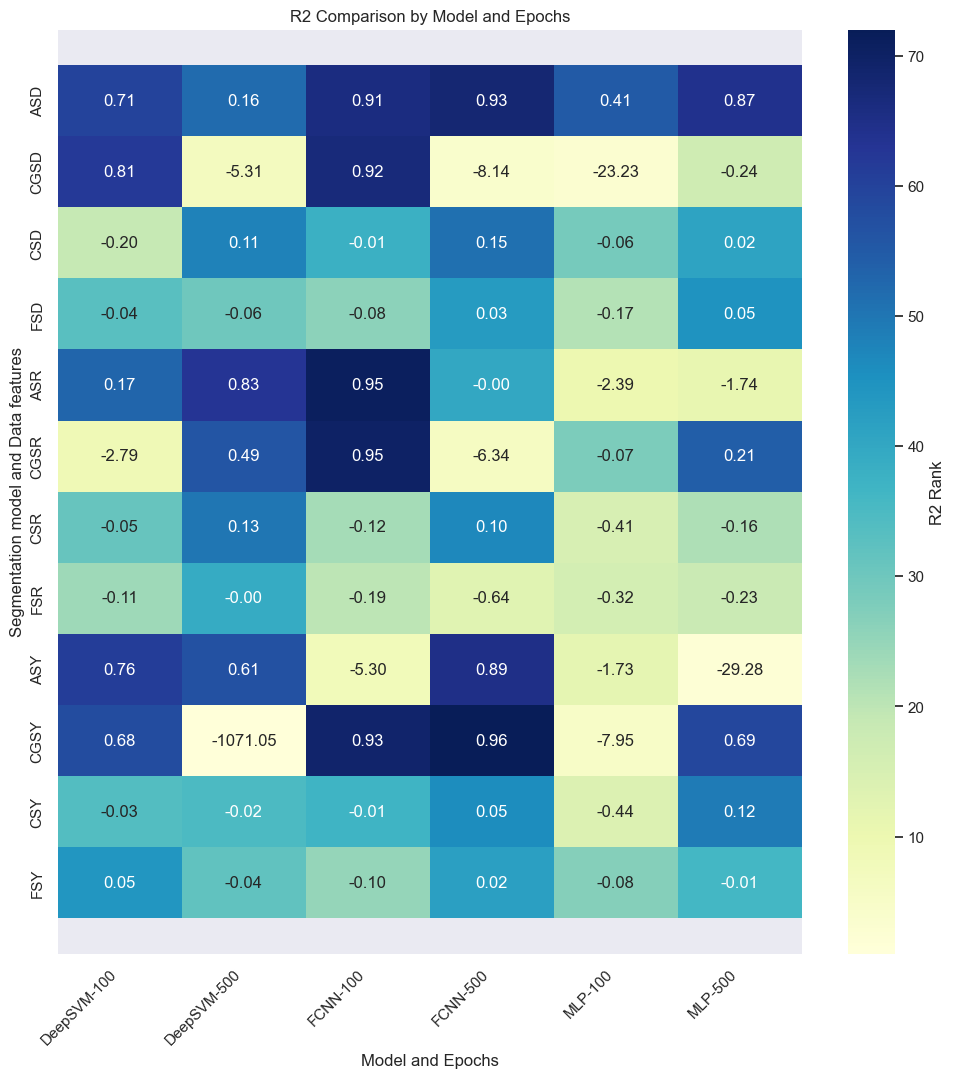

In [9]:
dlS = plot_r2_heatmap7(resultsDL, 'S', 12, 12)


  experiment     test_name dataset_name model_name epoch           r2  r2_rank
0        Raw  DeepLearning         CGRR        MLP   100    -5.561486     13.0
1        Raw  DeepLearning         CGRR        MLP   500 -5140.528238      1.0
2        Raw  DeepLearning         CGRR       FCNN   100     0.418348     64.0


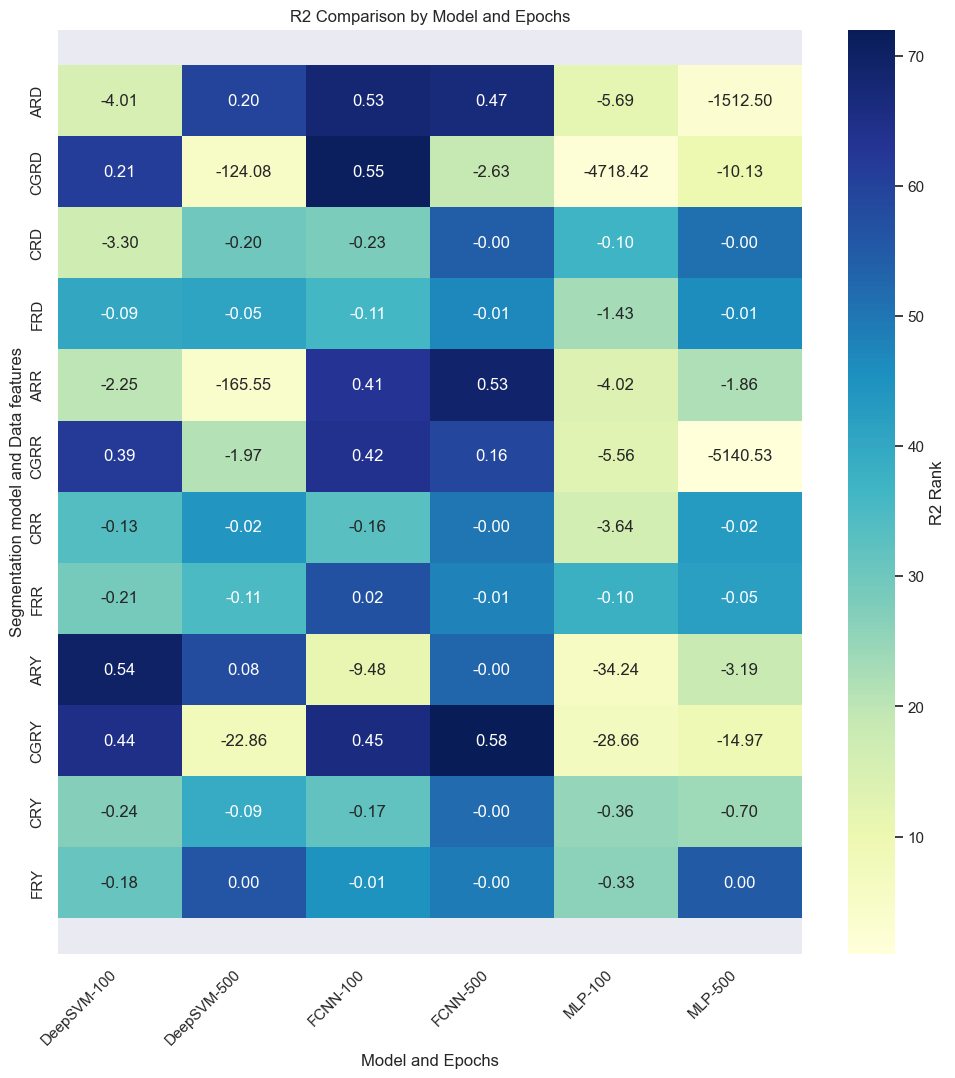

In [10]:
dlR = plot_r2_heatmap7(resultsDL, 'R', 12, 12)

  experiment test_name dataset_name model_name epoch        r2  r2_rank
0        Raw    Images         CIBR        CNN   100 -0.004041     16.0
1        Raw    Images         CIBR        CNN   300 -0.286355     14.0
2        Raw    Images         CIBR   DenseNet   100 -0.444931     11.0


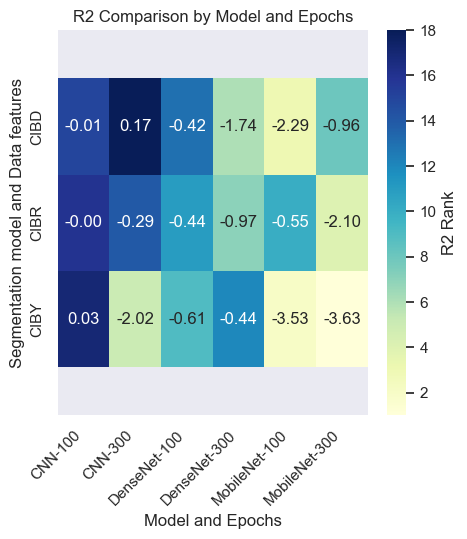

In [11]:
cnnB = plot_r2_heatmap7(resultsCNN, 'B', 5, 5)


  experiment test_name dataset_name model_name epoch        r2  r2_rank
0        Raw    Images         CISR        CNN   100 -0.008425      4.0
1        Raw    Images         CISR        CNN   300 -0.343561      3.0
2        Raw    Images         CISR   DenseNet   100  0.541273     12.0


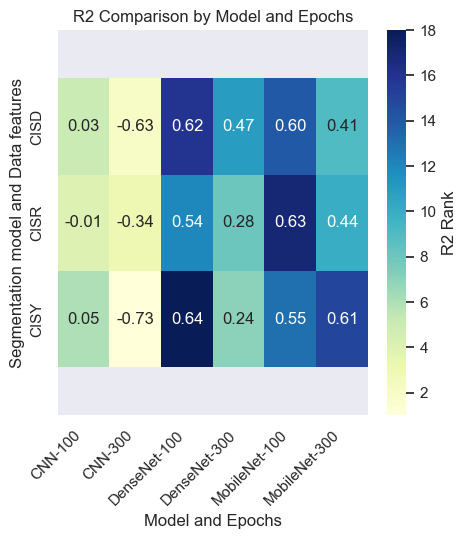

In [12]:
cnnS = plot_r2_heatmap7(resultsCNN, 'S', 5, 5)

  experiment test_name dataset_name model_name epoch        r2  r2_rank
0        Raw    Images         CIRR        CNN   100 -0.007139     15.0
1        Raw    Images         CIRR        CNN   300 -0.004507     16.0
2        Raw    Images         CIRR   DenseNet   100 -0.147463     12.0


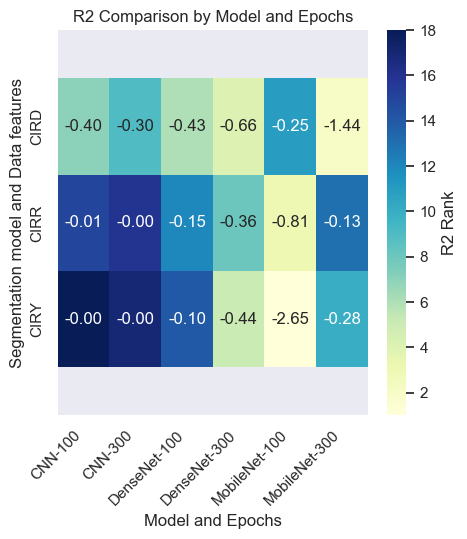

In [13]:
cnnR = plot_r2_heatmap7(resultsCNN, 'R', 5, 5)


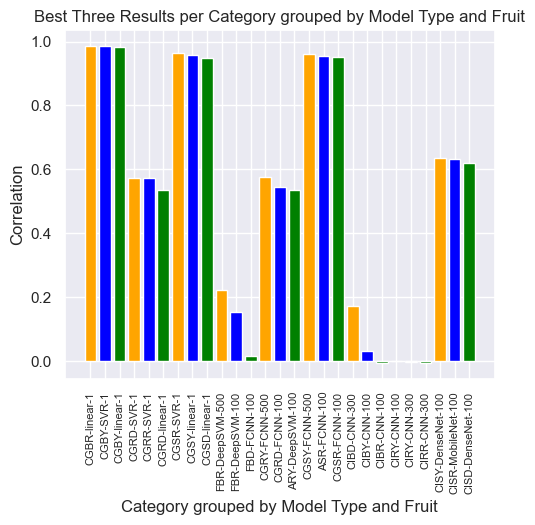

CGBR-linear-1: 0.9853256207471913
CGBY-SVR-1: 0.9851861959998056
CGBY-linear-1: 0.9824953995479875
CGBD-linear-1: 0.9804995425504345
CGBR-SVR-1: 0.9779571449284651
CGSR-SVR-1: 0.9632027766646506
CGSY-FCNN-500: 0.9607743339225475
CGBD-SVR-1: 0.9592813074499945
CGSY-linear-1: 0.9592394693437996
ASR-FCNN-100: 0.9539400265955356
CGSR-FCNN-100: 0.9527127106623321
CGSD-linear-1: 0.9469714400321521
CGSY-SVR-1: 0.9443953217336918
CGSY-FCNN-100: 0.9332633396344714
ASD-FCNN-500: 0.9278593162094384
CGSR-linear-1: 0.9217923962441629
CGSD-FCNN-100: 0.9186303549368279
ASD-FCNN-100: 0.910923536612337
ASY-FCNN-500: 0.8884026893291793
CGSD-SVR-1: 0.8765796302593357
ASD-MLP-500: 0.8699326474722493
ASR-DeepSVM-500: 0.8299304556287449
CGSD-DeepSVM-100: 0.8127959026750093
ASY-DeepSVM-100: 0.7577848610216535
ASD-DeepSVM-100: 0.7078707961627188
CGSY-MLP-500: 0.6858515011097668
CGSY-DeepSVM-100: 0.6755797287511334
CISY-DenseNet-100: 0.6359449562524531
CISR-MobileNet-100: 0.6313476882820155
CISD-DenseNet-100: 

In [26]:
import matplotlib.pyplot as plt
from tabulate import tabulate


# Combine all lists into a single list
all_data = [mlB, mlR, mlS,
            dlB, dlR, dlS,
            cnnB, cnnR, cnnS]
# Initialize lists to store the top three results from each category
top_three_results = []

# Iterate over each category and extract the best three results
for category in all_data:
    sorted_category = sorted(category, key=lambda x: x[1], reverse=True)
    top_three_results.extend(sorted_category[:3])

# Separate the names and values for plotting
names = [item[0] for item in top_three_results]
values = [item[1] for item in top_three_results]

# Define a list of custom colors
colors = ['orange', 'blue', 'green']

# Create an array of indices for the x-axis
x = np.arange(len(names))

# Create a bar plot with different colors per category
plt.bar(x, values, color=colors)
# Set the x-axis tick labels
plt.xticks(x, names, rotation='vertical', ha='center', fontsize=8)

plt.tight_layout()  # Adjust spacing between subplots

plt.xlabel('Category grouped by Model Type and Fruit')
plt.ylabel('Correlation')
plt.title('Best Three Results per Category grouped by Model Type and Fruit')

# Set the x-axis tick labels
plt.xticks(x, names)

plt.show()


all_results = [item for sublist in all_data for item in sublist]

# Sort the results by value in descending order
sorted_results = sorted(all_results, key=lambda x: x[1], reverse=True)

# Print the sorted results
for name, value in sorted_results:
    print(f'{name}: {value}')

# Sort the data based on the second column (value 1)
sorted_data = sorted(sorted_results, key=lambda x: x[1], reverse=True)

# Add ranks to the sorted data
ranked_data = [[rank + 1] + row for rank, row in enumerate(sorted_data)]

# Define the table headers
headers = ['Rank', 'Dataset and Test', 'Correlation']

# Print the table in LaTeX format
table = tabulate(ranked_data, headers, tablefmt='latex')
print(table)

In [49]:
import plotly.graph_objects as go

# Lists of data in the format [[name, value], [name, value], [name, value]]
category1_list1 = [['A', 10], ['B', 20], ['C', 15], ['D', 5], ['E', 25]]
category1_list2 = [['F', 18], ['G', 12], ['H', 22], ['I', 8], ['J', 16]]
category1_list3 = [['K', 14], ['L', 21], ['M', 17], ['N', 9], ['O', 11]]

category2_list1 = [['P', 19], ['Q', 23], ['R', 13], ['S', 7], ['T', 24]]
category2_list2 = [['U', 30], ['V', 28], ['W', 26], ['X', 27], ['Y', 29]]
category2_list3 = [['Z', 31], ['AA', 33], ['BB', 35], ['CC', 34], ['DD', 32]]

category3_list1 = [['EE', 36], ['FF', 37], ['GG', 38], ['HH', 39], ['II', 40]]
category3_list2 = [['JJ', 41], ['KK', 42], ['LL', 43], ['MM', 44], ['NN', 45]]
category3_list3 = [['OO', 46], ['PP', 47], ['QQ', 48], ['RR', 49], ['SS', 50]]

# Combine all lists into a single list of categories
all_categories = [category1_list1, category1_list2, category1_list3,
                  category2_list1, category2_list2, category2_list3,
                  category3_list1, category3_list2, category3_list3]

# Initialize a list to store the best three results per category
top_three_results = []

# Iterate over each category and extract the best three results
for category in all_categories:
    sorted_category = sorted(category, key=lambda x: x[1], reverse=True)
    top_three_results.extend(sorted_category[:3])

# Separate the names and values for plotting
names = [item[0] for item in top_three_results]
values = [item[1] for item in top_three_results]

# Define a list of custom colors
colors = ['orange', 'blue', 'green']

# Create a bar graph with divisions between every nine values
fig = go.Figure()

for i, (name, value) in enumerate(zip(names, values)):
    if (i + 1) % 9 == 0:
        fig.add_trace(go.Bar(x=[name], y=[value], marker_color='rgba(0, 0, 0, 0)'))
    else:
        fig.add_trace(go.Bar(x=[name], y=[value], marker_color=colors[i // 3]))

fig.update_layout(
    xaxis=dict(
        tickangle=-90,
        tickfont=dict(size=8),
        showgrid=False,
    ),
    yaxis=dict(
        title='Value',
    ),
    title='Best Three Results per Category',
)

fig.show()


IndexError: list index out of range

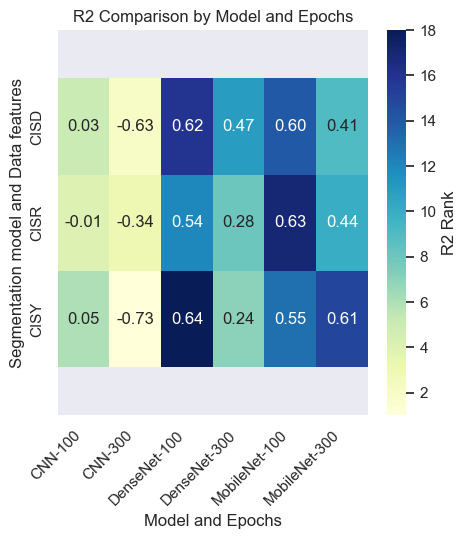

In [91]:
plot_r2_heatmap6(resultsCNN, 'S', 5, 5)


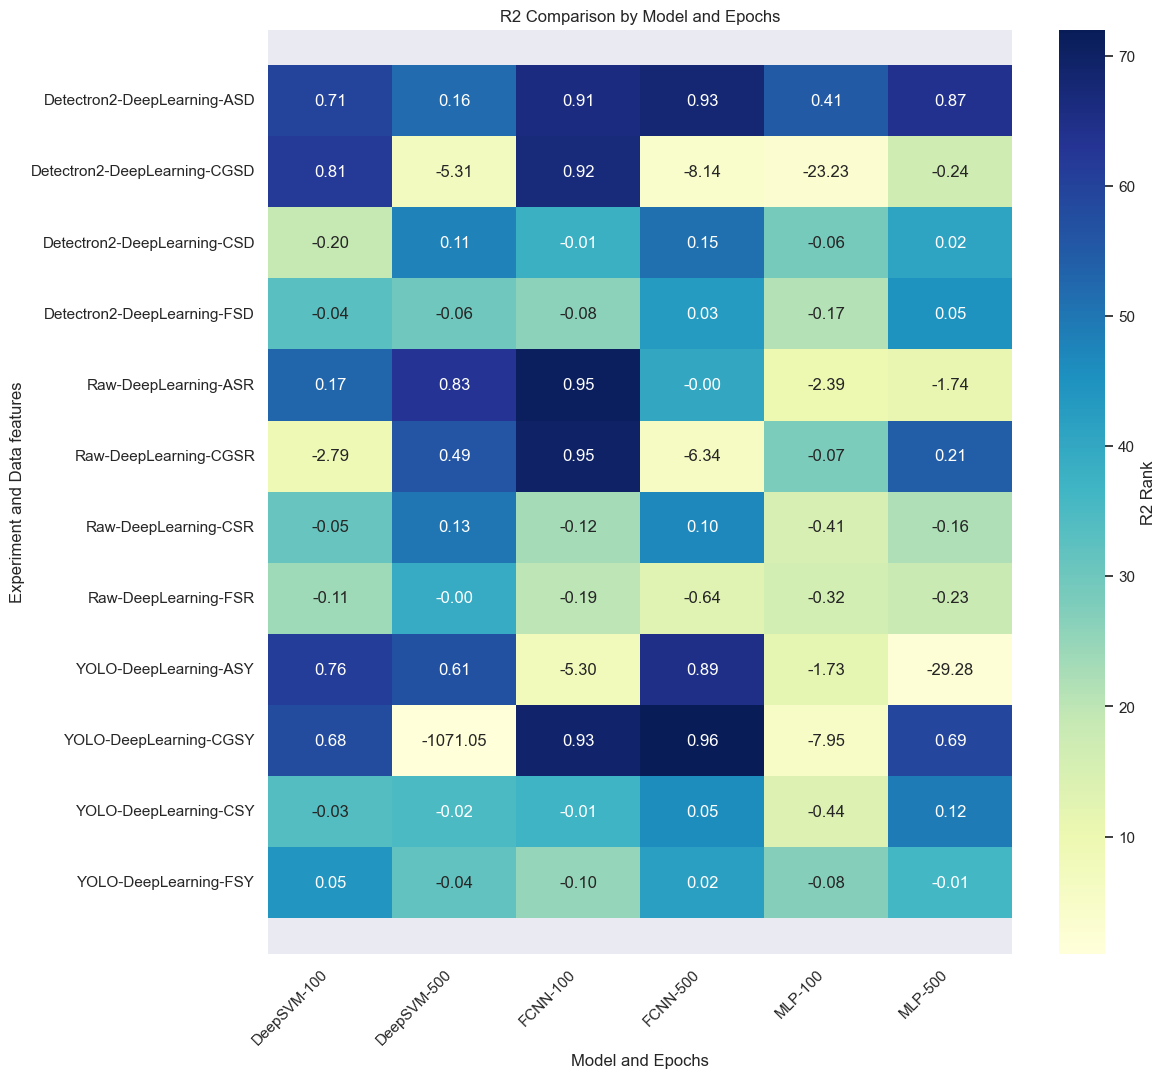

In [36]:
plot_r2_heatmap4(resultsDL, 'S')


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

DLdata = []
MLdata = []
CNNdata = []

def plot_r2_heatmap3(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    DLdata = []
    MLdata = []
    CNNdata = []

    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            if(test_name != "MachineLearning"):
                                r2_data.append({
                                    'experiment': experiment,
                                    'test_name': test_name,
                                    'dataset_name': dataset_name,
                                    'model_name': model_name,
                                    'epoch': epoch,
                                    'r2': epoch_data['r2']
                                })
                            else:
                                

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    # Create a pivot table with the R2 rank values
    pivot_table = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'})
    ax.set_title("R2 Rank Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    return r2_df


    experiment     test_name dataset_name model_name epoch           r2  \
29        YOLO  DeepLearning         CGSY    DeepSVM   500 -1071.051310   
43        YOLO  DeepLearning          ASY        MLP   500   -29.282137   
48  Detectron2  DeepLearning         CGSD        MLP   100   -23.230175   
51  Detectron2  DeepLearning         CGSD       FCNN   500    -8.138621   
24        YOLO  DeepLearning         CGSY        MLP   100    -7.949717   
3          Raw  DeepLearning         CGSR       FCNN   500    -6.340801   
53  Detectron2  DeepLearning         CGSD    DeepSVM   500    -5.311340   
44        YOLO  DeepLearning          ASY       FCNN   100    -5.302628   
4          Raw  DeepLearning         CGSR    DeepSVM   100    -2.788715   
18         Raw  DeepLearning          ASR        MLP   100    -2.386650   

    r2_rank  
29      1.0  
43      2.0  
48      3.0  
51      4.0  
24      5.0  
3       6.0  
53      7.0  
44      8.0  
4       9.0  
18     10.0  
1.0
2.0
3.0
4.0
5.0


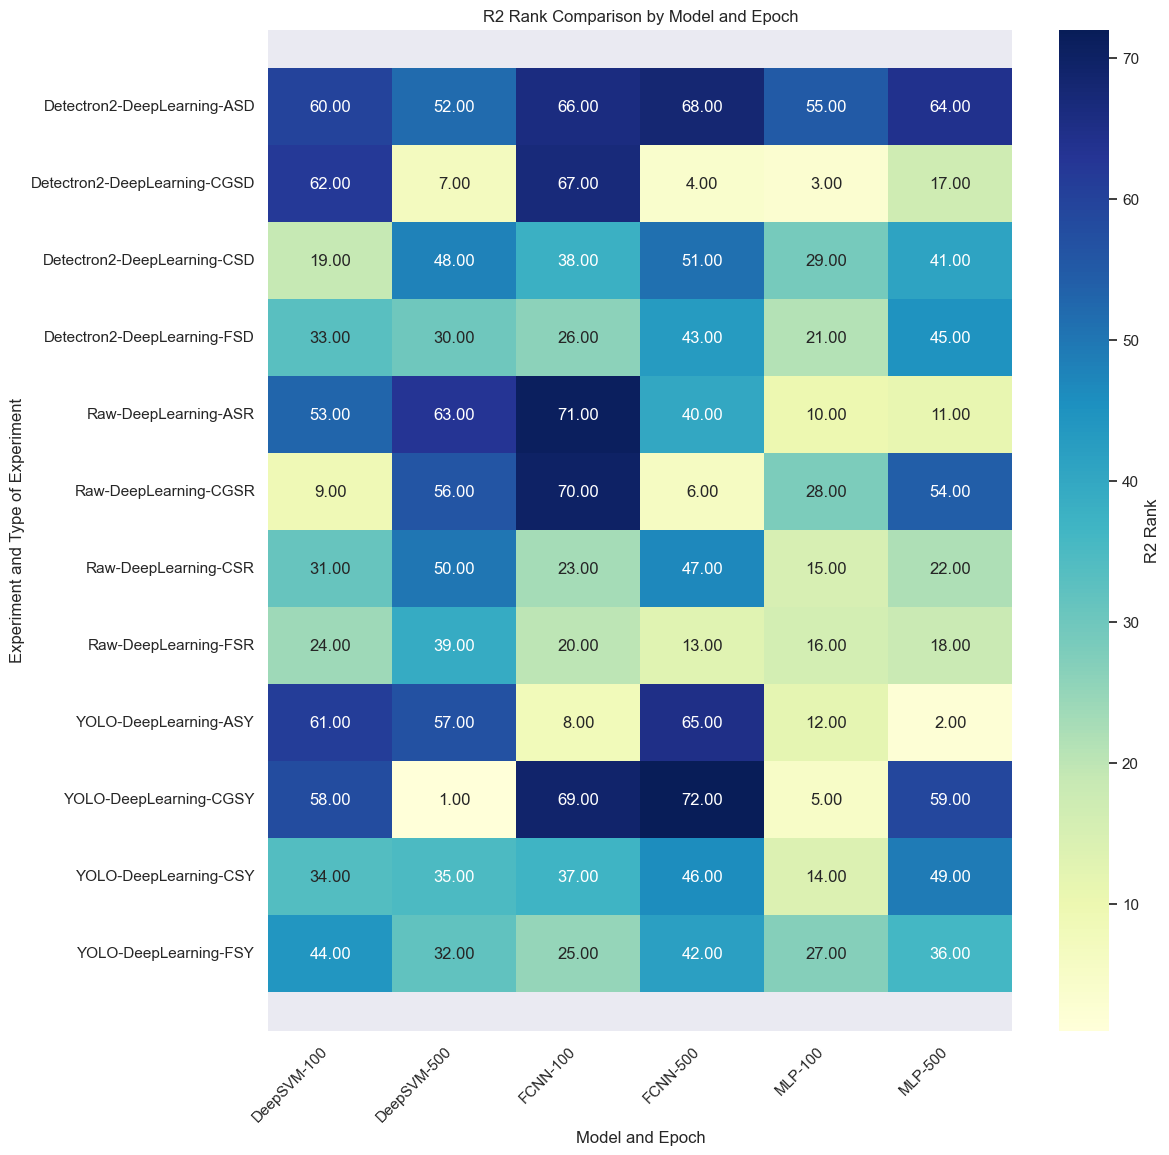

In [11]:
r2DL = plot_r2_heatmap3(resultsDL, 'S')

r2DL = r2DL.sort_values(by = ["r2_rank"])
print(r2DL.head(10))


for i in range(len(r2DL)):
    print(r2DL.iloc[i]["r2_rank"])


In [25]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap2(results_dict, fruitInitial):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    loss_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                #print(dataset_name[::-1][1])
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2']
                            })

    r2_df = pd.DataFrame(r2_data)
    #loss_df = pd.DataFrame(loss_data)
    #r2_df['r2_rank'] = r2_df['r2'].rank()


    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmapth
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


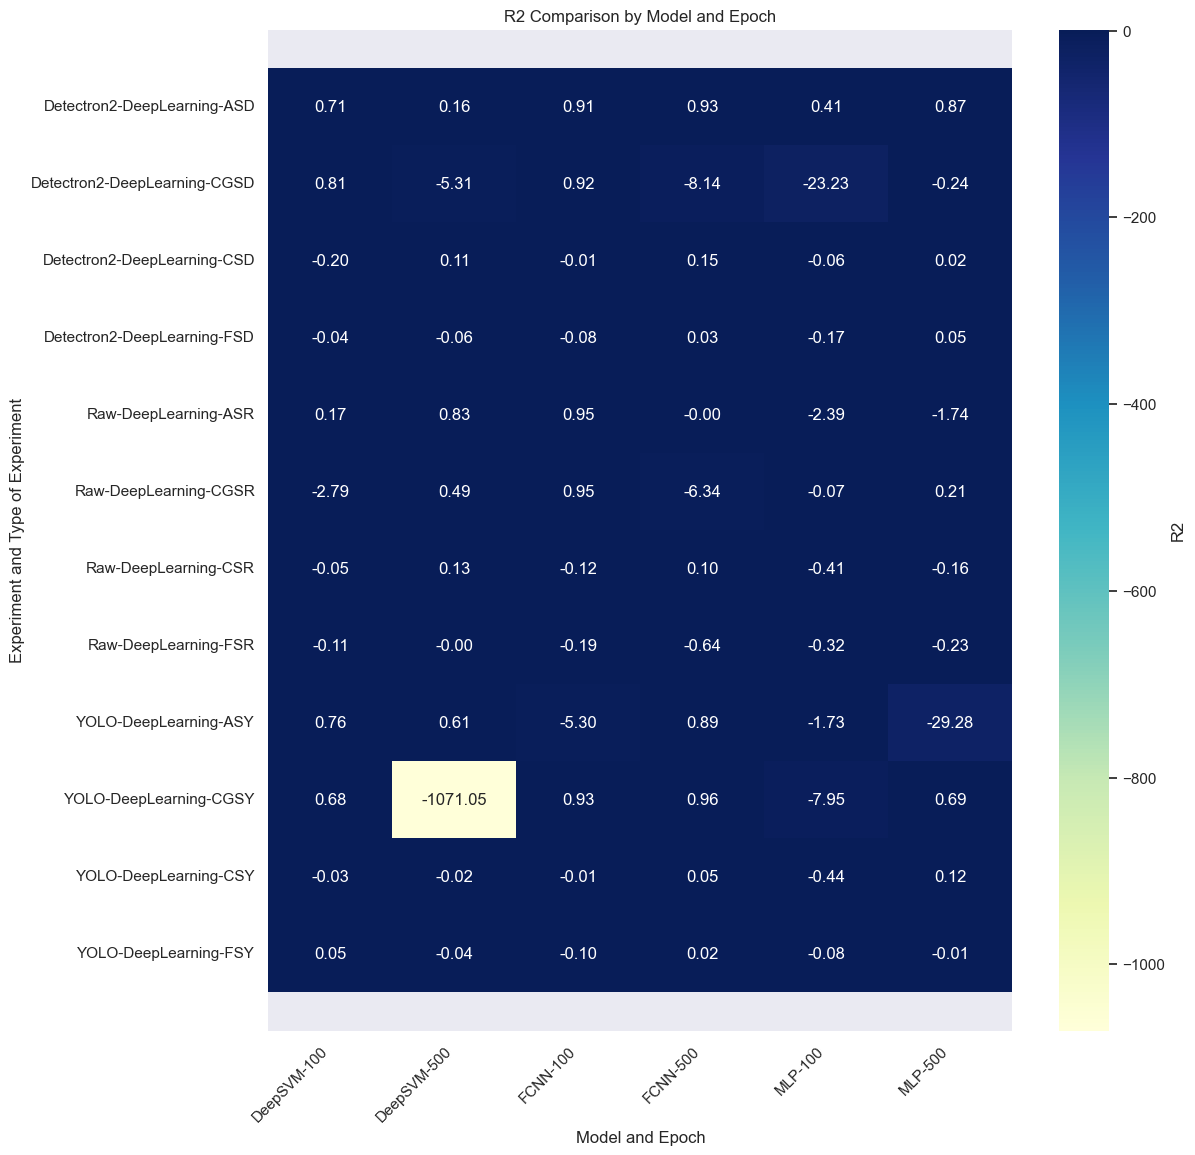

In [26]:
plot_r2_heatmap2(resultsDL, 'S')


In [230]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap(results_dict):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    loss_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        r2_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'r2': epoch_data['r2']
                        })

    r2_df = pd.DataFrame(r2_data)
    #loss_df = pd.DataFrame(loss_data)



    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmapth
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(12,13)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'})
    ax.set_title("R2 Comparison by Model and Epoch")
    ax.set_xlabel("Model and Epoch")
    ax.set_ylabel("Experiment and Type of Experiment")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [229]:
plot_r2_heatmap

In [151]:
!pip3 install plotly==5.14.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [248]:
import matplotlib.pyplot as plt
import numpy as np

def plot_r2_by_class(results_dict):
    r2_by_class = {}
    for experiment_name, experiment in results_dict.items():
        for test_name, test in experiment.items():
            for dataset_name, dataset in test.items():
                for model_name, model in dataset.items():
                    for epoch, result in model.items():
                        experiment_class = (experiment_name, test_name, dataset_name, model_name, epoch)
                        if experiment_class not in r2_by_class:
                            r2_by_class[experiment_class] = result['r2']
                        else:
                            r2_by_class[experiment_class] += result['r2']

    sorted_r2_by_class = sorted(r2_by_class.items(), key=lambda x: x[1], reverse=True)

    num_classes = len(sorted_r2_by_class)
    x = np.arange(num_classes)
    r2_values = [item[1] for item in sorted_r2_by_class]
    labels = [f"{item[0][0]} {item[0][1]} {item[0][2]} {item[0][3]} {item[0][4]}" for item in sorted_r2_by_class]
    sns.set(rc={'figure.figsize':(40,12)}) #resultsML 8,6 resultsDL 12,13

    plt.bar(x, r2_values)
    plt.xticks(x, labels, rotation=90)
    plt.ylabel('R2')
    plt.show()


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_r2_heatmap_3d(results_dict):
    # Create a pandas dataframe with the R2 values
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        r2_data.append({
                            'experiment': experiment,
                            'test_name': test_name,
                            'dataset_name': dataset_name,
                            'model_name': model_name,
                            'epoch': epoch,
                            'r2': epoch_data['r2']
                        })

    r2_df = pd.DataFrame(r2_data)

    print(r2_df)

    # Create a pivot table with the R2 values, indexed by experiment, type of experiment, model, and number of epochs
    pivot_table = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    
    # Create the 3D heatmap
    fig = plt.figure(figsize=(12, 13))
    ax = fig.add_subplot(111, projection='3d')

    xticks = np.arange(len(pivot_table.columns.levels[0]))
    yticks = np.arange(len(pivot_table.index))
    xpos, ypos = np.meshgrid(xticks, yticks, indexing='ij')
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros(len(xpos))

    dx = 0.5 * np.ones_like(zpos)
    dy = 0.5 * np.ones_like(zpos)
    dz = pivot_table.values.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

    ax.set_xticks(xticks)
    ax.set_xticklabels(pivot_table.columns.levels[0])
    ax.set_xlabel('Model and Epoch')

    ax.set_yticks(yticks)
    ax.set_yticklabels(pivot_table.index)
    ax.set_ylabel('Experiment and Type of Experiment')

    ax.set_zlabel('R2')

    ax.set_title("R2 Comparison by Model and Epoch")

    plt.show()
    


    experiment        test_name dataset_name model_name epoch        r2
0          Raw  MachineLearning         CGBR     linear     1  0.985326
1          Raw  MachineLearning         CGBR        SVR     1  0.977957
2          Raw  MachineLearning         CGRR     linear     1  0.485427
3          Raw  MachineLearning         CGRR        SVR     1  0.572087
4          Raw  MachineLearning         CGSR     linear     1  0.921792
5          Raw  MachineLearning         CGSR        SVR     1  0.963203
6         YOLO  MachineLearning         CGBY     linear     1  0.982495
7         YOLO  MachineLearning         CGBY        SVR     1  0.985186
8         YOLO  MachineLearning         CGRY     linear     1  0.499399
9         YOLO  MachineLearning         CGRY        SVR     1  0.460026
10        YOLO  MachineLearning         CGSY     linear     1  0.959239
11        YOLO  MachineLearning         CGSY        SVR     1  0.944395
12  Detectron2  MachineLearning         CGBD     linear     1  0

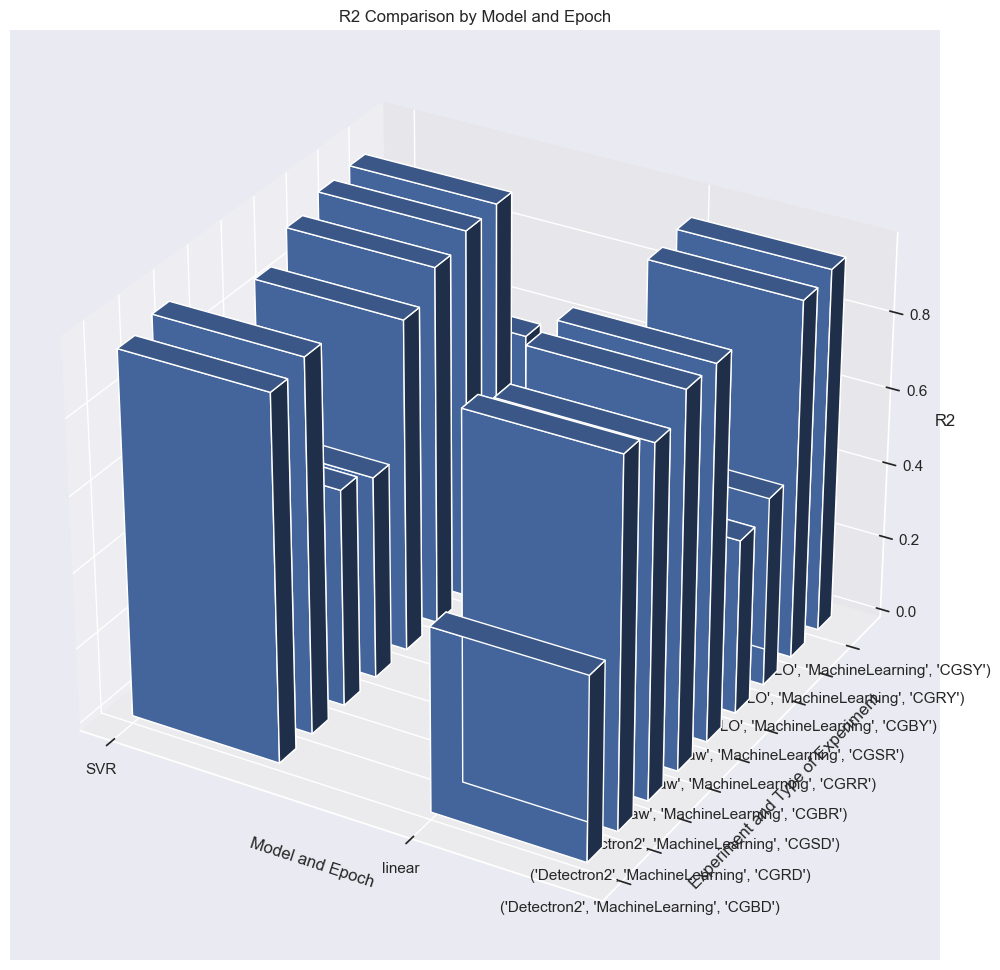

In [239]:
plot_r2_heatmap_3d(resultsML)


In [226]:
plot_r2_heatmap_3d(resultsDL)



     experiment     test_name dataset_name model_name epoch          r2
0           Raw  DeepLearning         CGBR        MLP   100  -64.701840
1           Raw  DeepLearning         CGBR        MLP   500 -119.533028
2           Raw  DeepLearning         CGBR       FCNN   100   -5.386048
3           Raw  DeepLearning         CGBR       FCNN   500   -4.810572
4           Raw  DeepLearning         CGBR    DeepSVM   100   -4.055665
..          ...           ...          ...        ...   ...         ...
211  Detectron2  DeepLearning          ASD        MLP   500    0.869933
212  Detectron2  DeepLearning          ASD       FCNN   100    0.910924
213  Detectron2  DeepLearning          ASD       FCNN   500    0.927859
214  Detectron2  DeepLearning          ASD    DeepSVM   100    0.707871
215  Detectron2  DeepLearning          ASD    DeepSVM   500    0.163382

[216 rows x 6 columns]


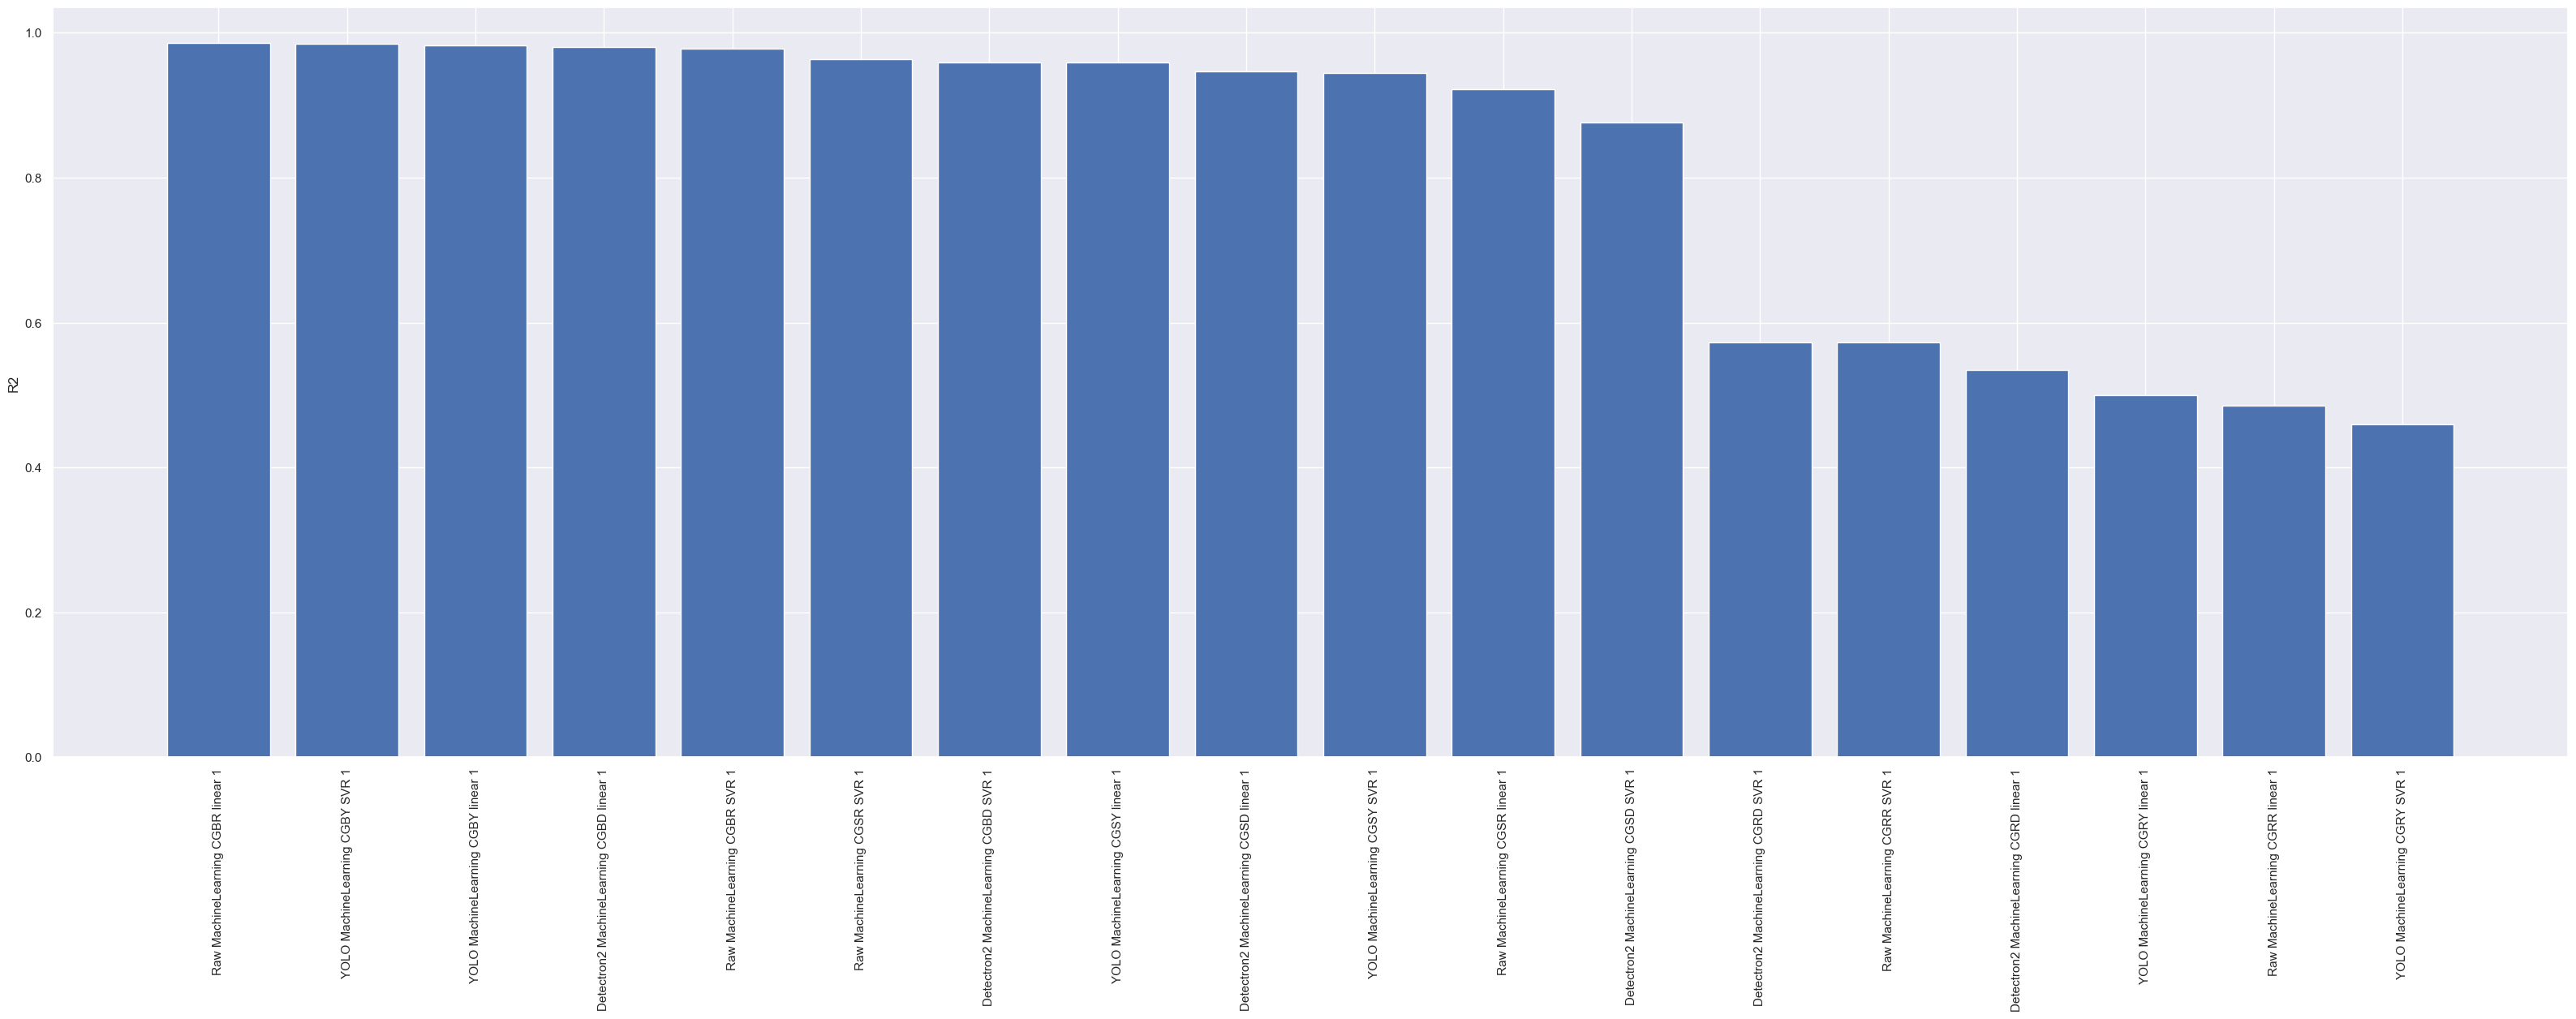

In [250]:
plot_r2_by_class(resultsML)

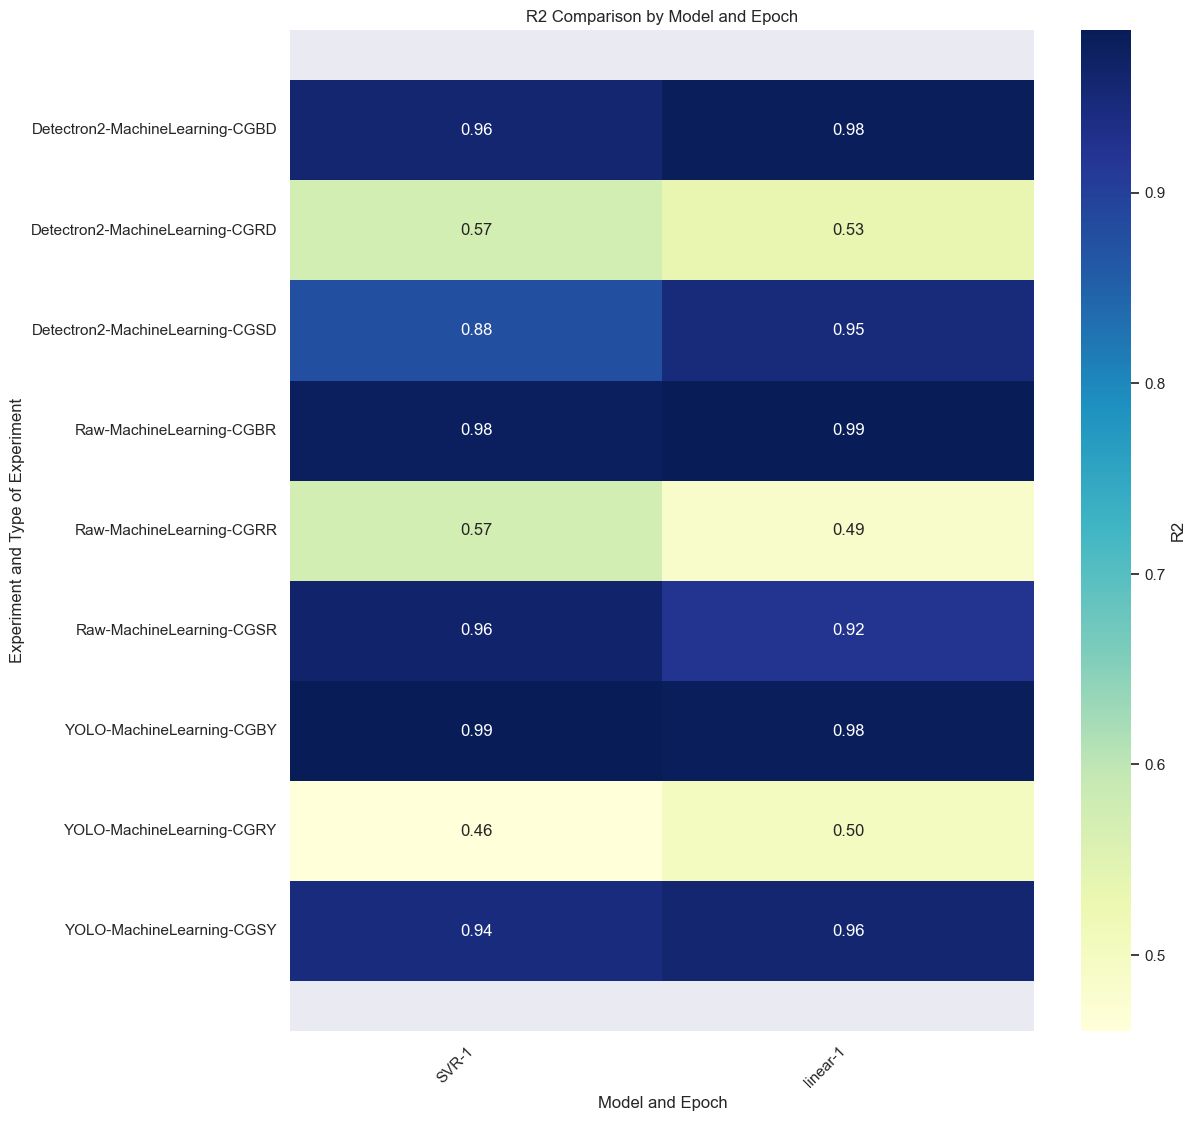

In [232]:
plot_r2_heatmap(resultsML)


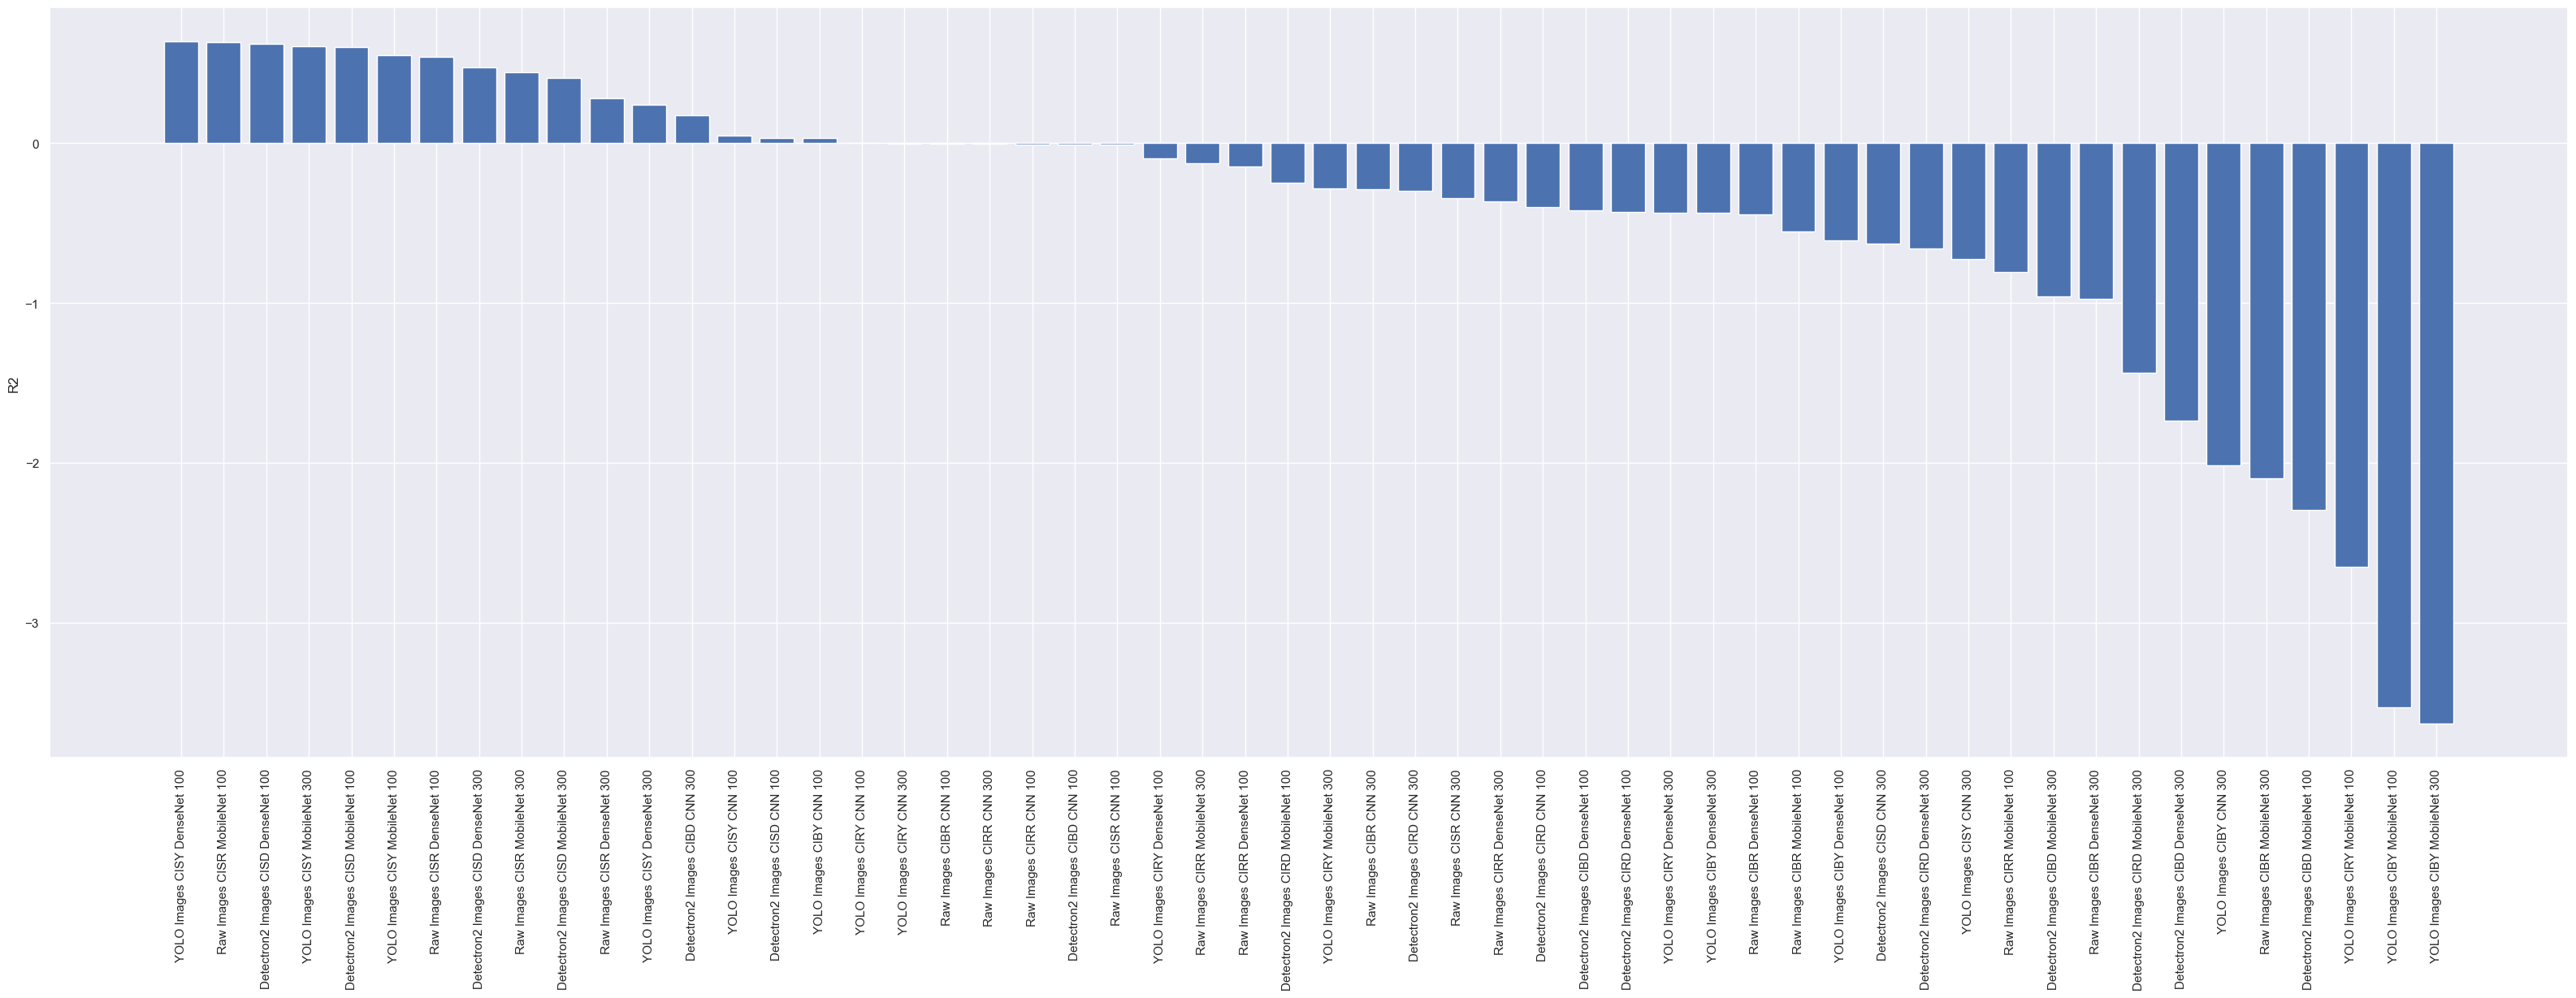

In [251]:
plot_r2_by_class(resultsCNN)

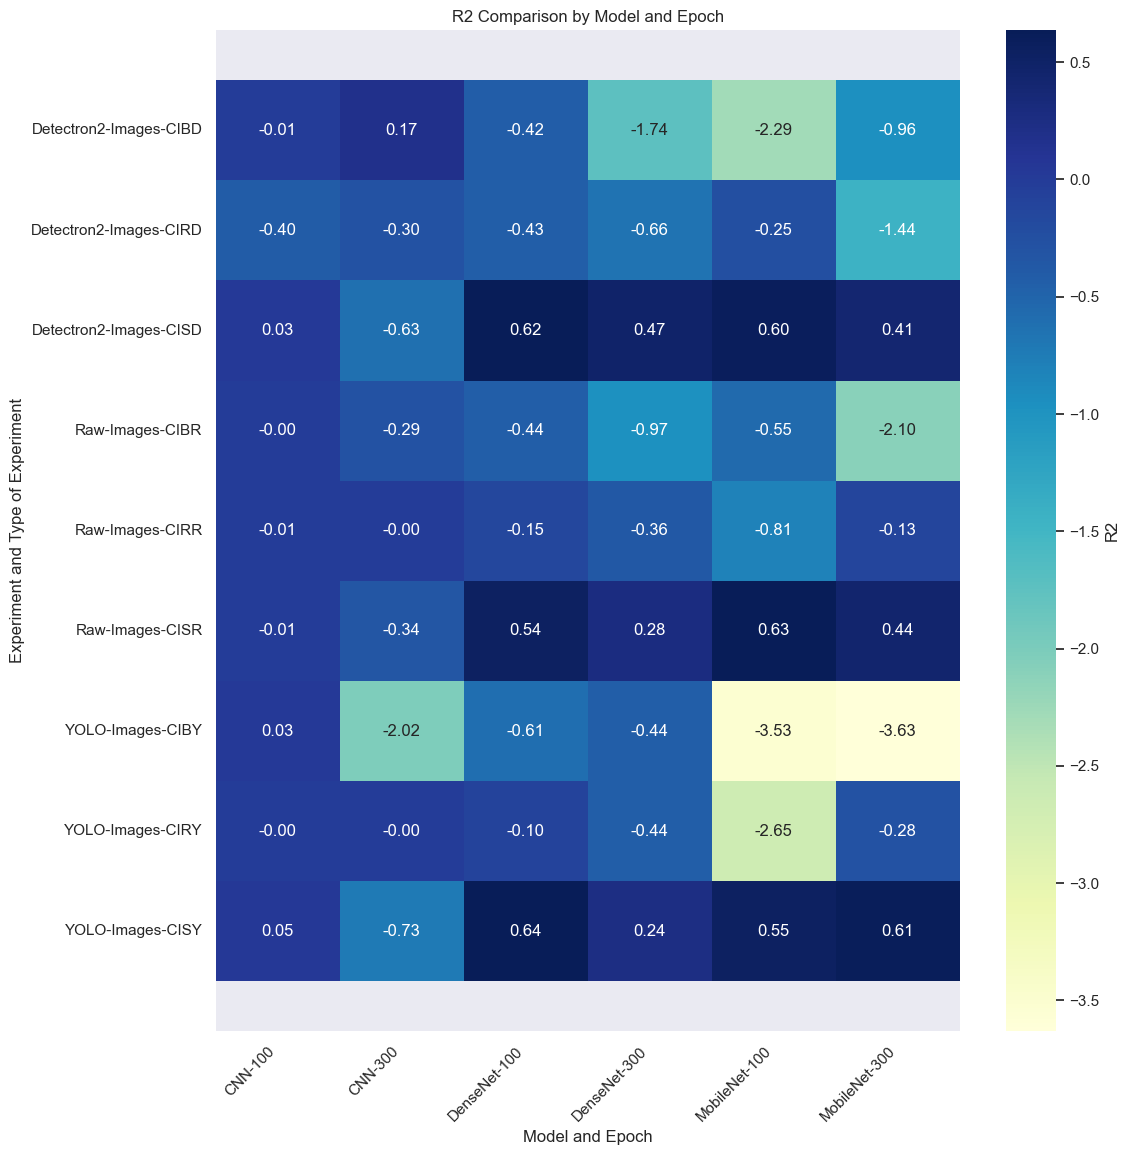

In [231]:
plot_r2_heatmap(resultsCNN)


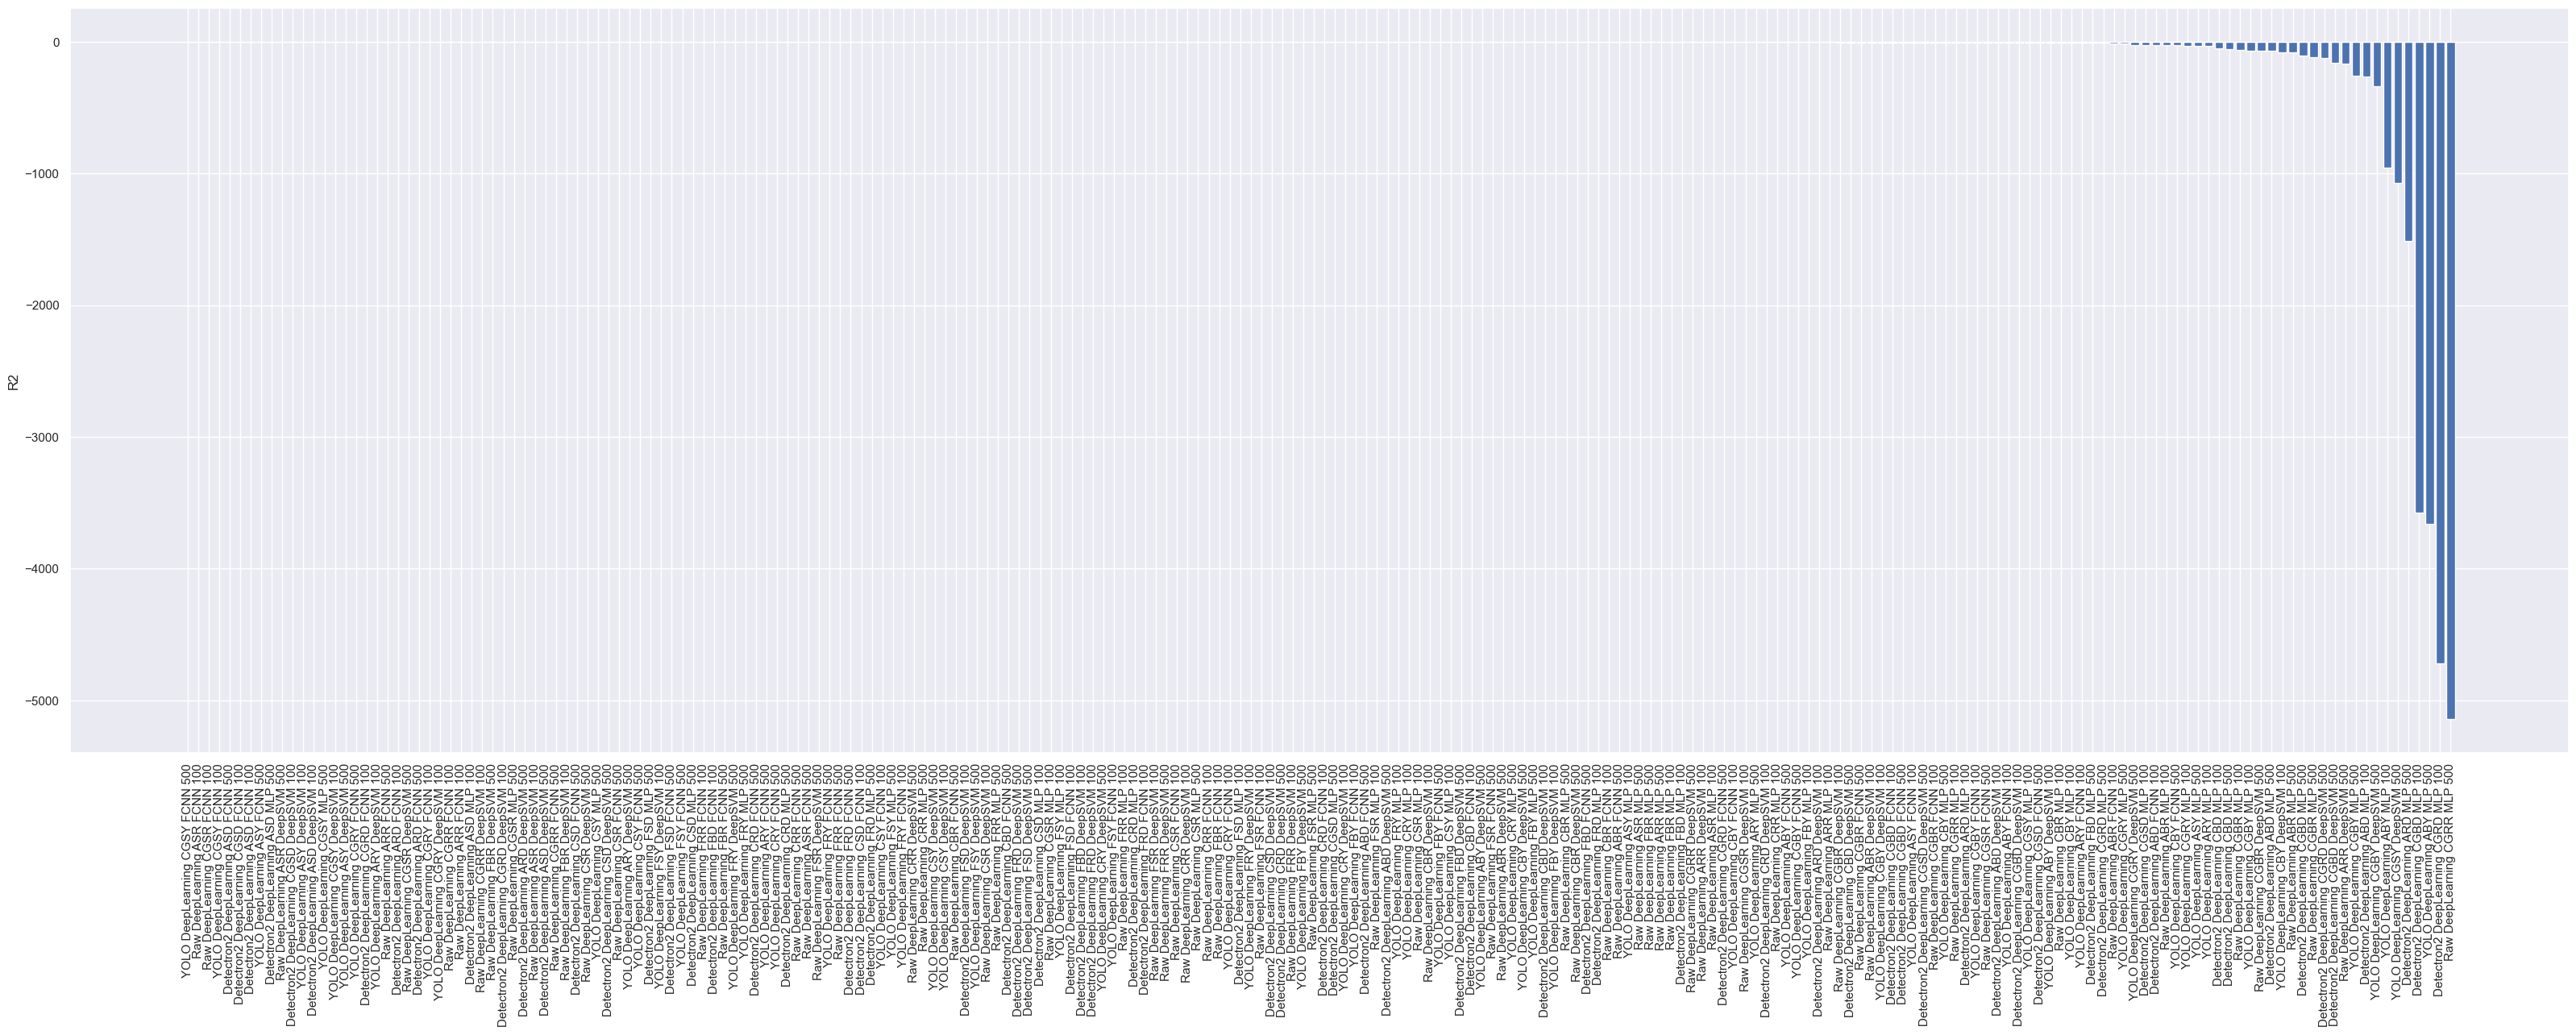

In [249]:
plot_r2_by_class(resultsDL)

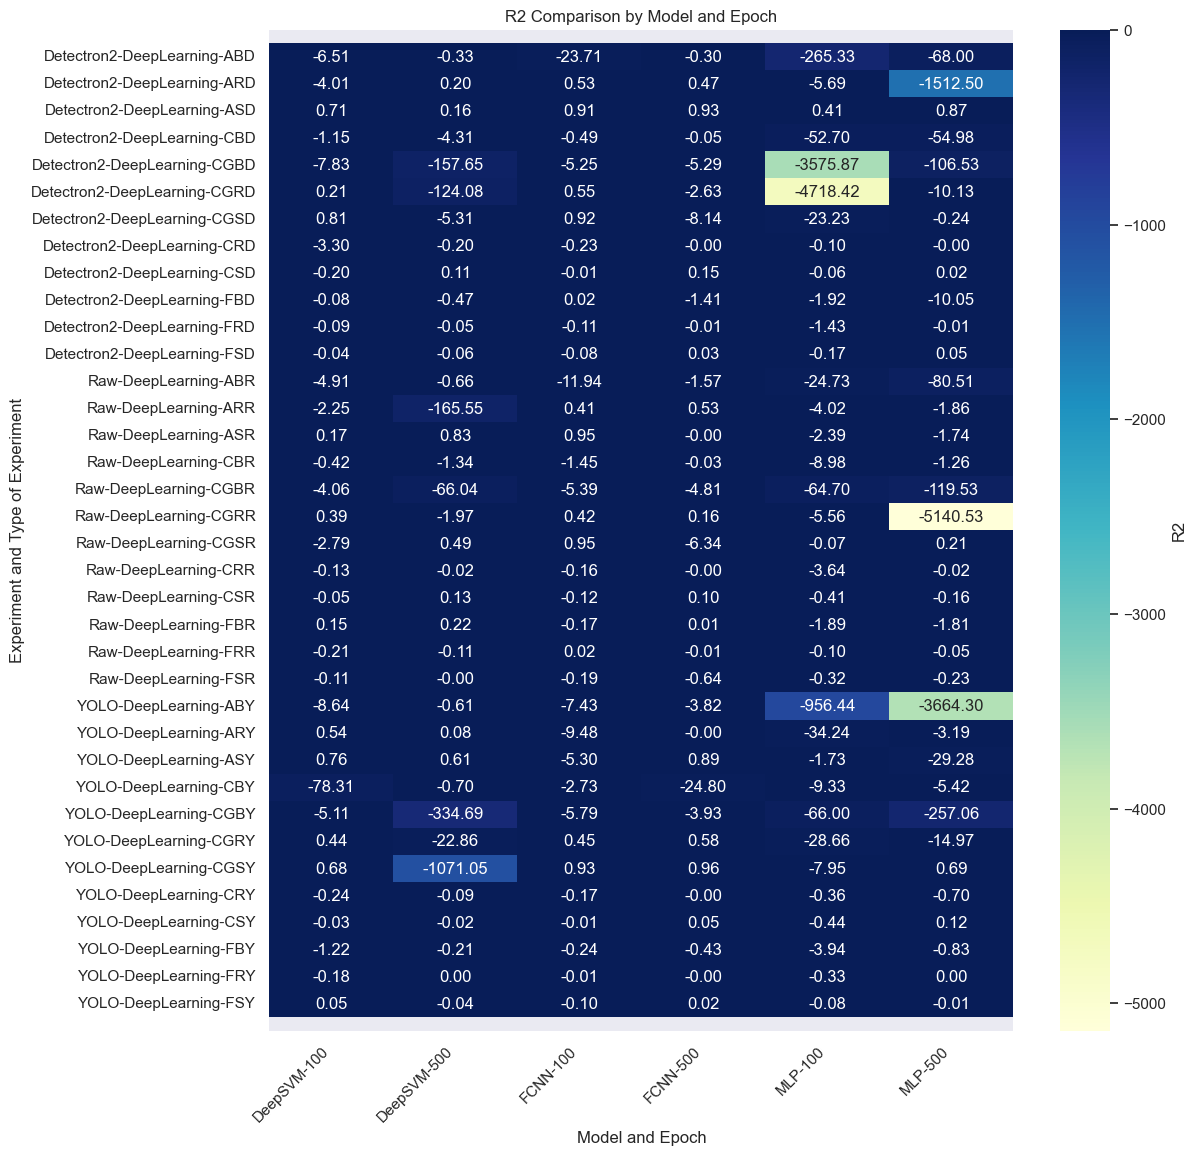

In [233]:
plot_r2_heatmap(resultsDL)


[['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'r2', -64.701839859492], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'loss', 18.549575805664062], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'mse', 18.549575805664062], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'mae', 4.2672224044799805], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '100', 'rmse', 4.30692195892334], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'r2', -119.53302798603754], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'loss', 85.44715881347656], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'mse', 85.44715881347656], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'mae', 9.205338478088379], ['Raw', 'DeepLearning', 'CGBR', 'MLP', '500', 'rmse', 9.243762969970703], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'r2', -5.38604791020252], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'loss', 2.576350450515747], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '100', 'mse', 2.576350450515747], ['Raw', 'DeepLearning', 'CGBR', 'FCNN', '1

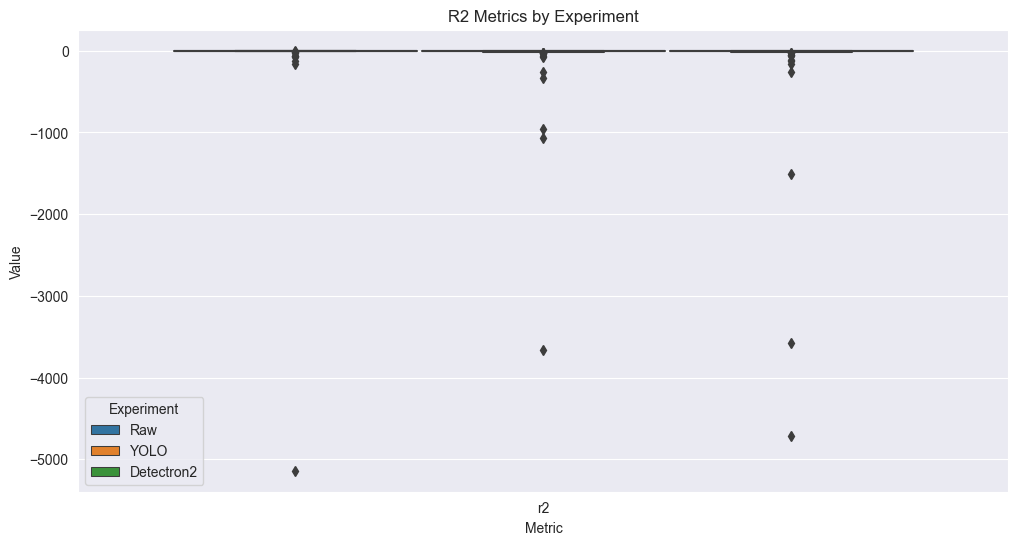

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsDL

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["Experiment", "","Fruit","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

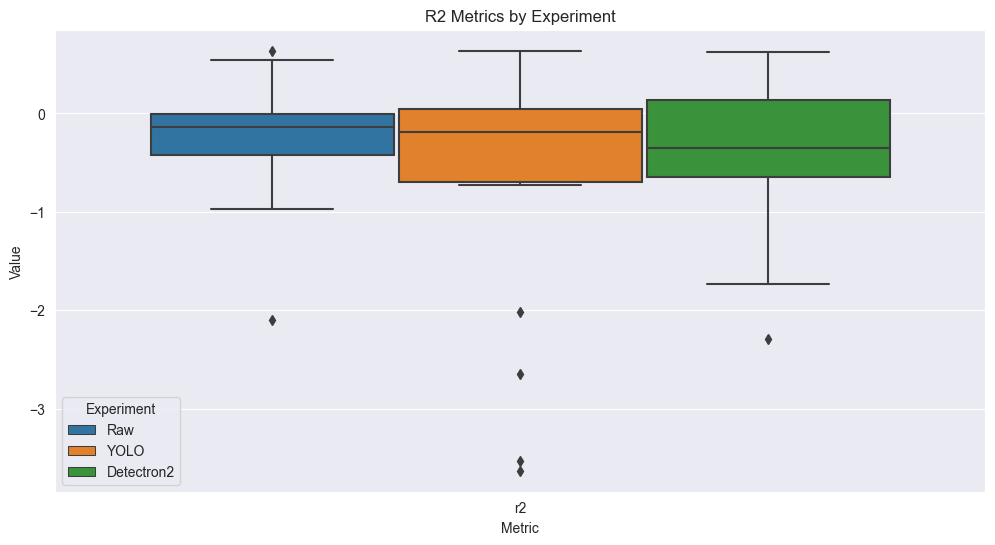

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
edgecolors=None
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Experiment", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Experiment")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

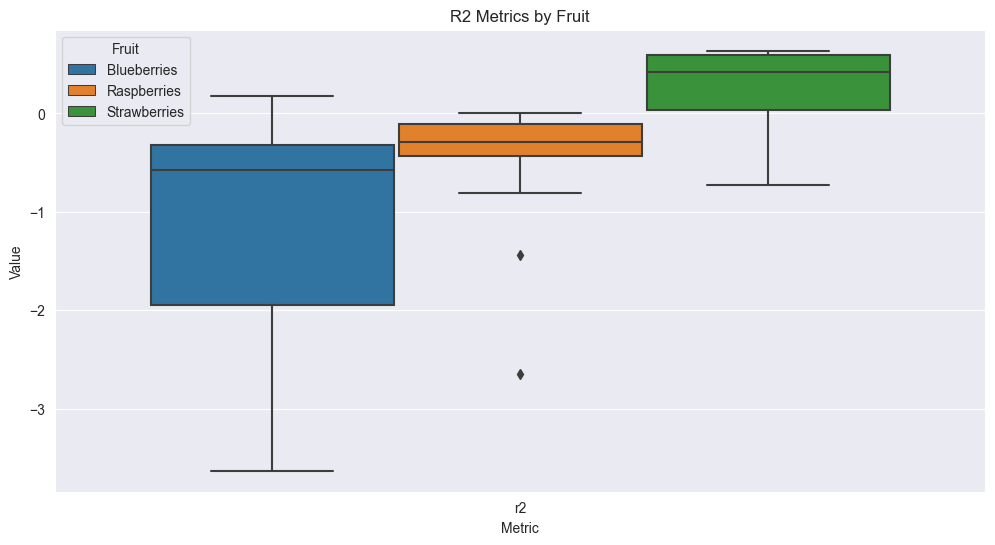

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#AQUI HAY QUE DARLE EL JSON MODIFICADO PARA QUE JALE
data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Fruit", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Fruit")
plt.show()


[['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.004041072212986885], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.28635505761112245], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.44493061337426054], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'DenseNet', 'Epochs', '300', 'r2', -0.9744979839520378], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '100', 'r2', -0.5500927296410199], ['Experiment', 'Raw', 'Fruits', 'Blueberries', 'Model', 'MobileNet', 'Epochs', '300', 'r2', -2.0988388365925834], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '100', 'r2', -0.007139206571461276], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'CNN', 'Epochs', '300', 'r2', -0.004507288967530609], ['Experiment', 'Raw', 'Fruits', 'Raspberries', 'Model', 'DenseNet', 'Epochs', '100', 'r2', -0.14746271950

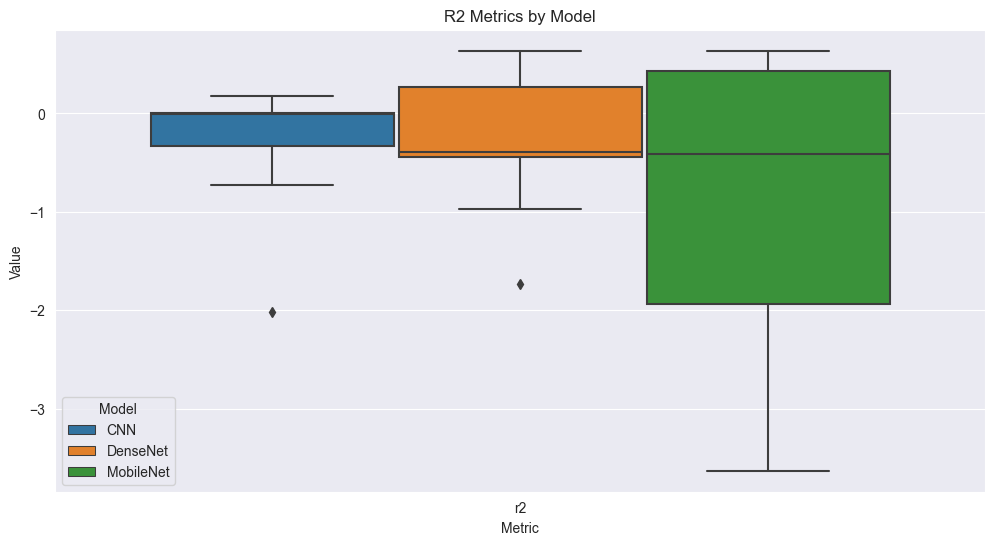

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, dict):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])


plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
#swarmplot = sns.swarmplot(x="Model", y="Value", hue="Experiment", data=df, dodge=True, color=".25", ax=boxplot)


plt.title("R2 Metrics by Model")
plt.show()


{'Experiment': {'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885}, '300': {'r2': -0.28635505761112245}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054}, '300': {'r2': -0.9744979839520378}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199}, '300': {'r2': -2.0988388365925834}}}}}, 'Raspberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.007139206571461276}, '300': {'r2': -0.004507288967530609}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.14746271950135226}, '300': {'r2': -0.3631432992968082}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.8085655605885449}, '300': {'r2': -0.127935126939972}}}}}, 'Strawberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.008424935786062182}, '300': {'r2': -0.3435609713584966}}}, 'DenseNet': {'Epochs': {'100': {'r2': 0.5412729376409295}, '300': {'r2': 0.2824198614051018}}}, 'MobileNet': {'Epochs': {'100': {'r2': 0.6313476882820155}, '300': {'r2': 0.4424399524643087}}}}}}}, 'Y

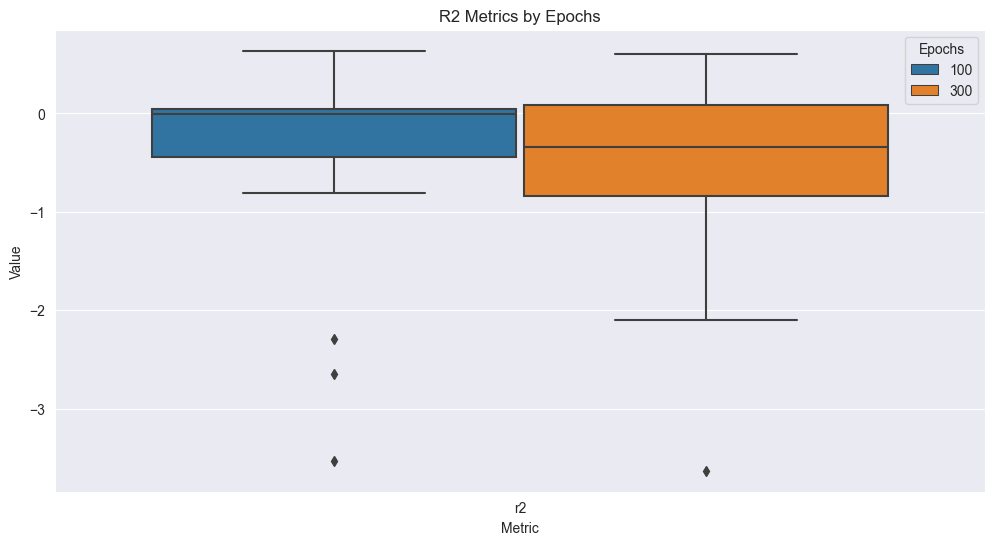

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = resultsCNN

print(data)

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

flat_data = list(flatten_json(data))
print(flat_data)
df = pd.DataFrame(flat_data, columns=["","Experiment", "","Fruit", "","Model", "","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Epochs", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


In [6]:
print(resultsCNN)

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 

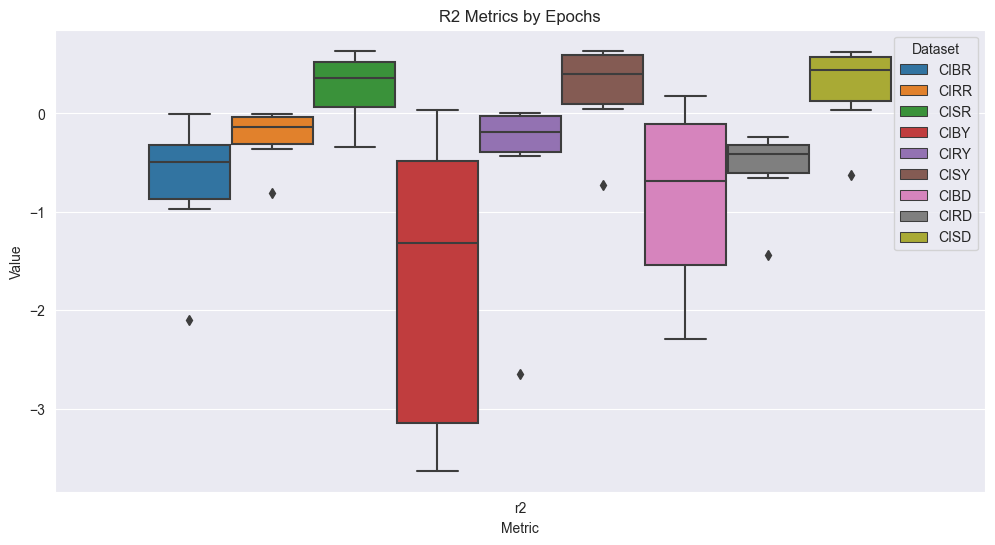

In [106]:
diction = {}

with open('resultsCNNAll.json') as json_file:
    diction = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = diction

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Experiment", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Dataset", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


{'Raw': {'DeepLearning': {'CGBR': {'MLP': {'100': {'r2': -64.701839859492, 'loss': 18.549575805664062, 'mse': 18.549575805664062, 'mae': 4.2672224044799805, 'rmse': 4.30692195892334}, '500': {'r2': -119.53302798603754, 'loss': 85.44715881347656, 'mse': 85.44715881347656, 'mae': 9.205338478088379, 'rmse': 9.243762969970703}}, 'FCNN': {'100': {'r2': -5.38604791020252, 'loss': 2.576350450515747, 'mse': 2.576350450515747, 'mae': 1.3141248226165771, 'rmse': 1.6051013469696045}, '500': {'r2': -4.810571955260061, 'loss': 2.7025272846221924, 'mse': 2.7025272846221924, 'mae': 1.357565999031067, 'rmse': 1.6439365148544312}}, 'DeepSVM': {'100': {'r2': -4.055664748611606, 'loss': 2.6975085735321045, 'mse': 2.6625924110412598, 'mae': 1.2837483882904053, 'rmse': 1.6317452192306519}, '500': {'r2': -66.04184856391224, 'loss': 23.51694679260254, 'mse': 23.481536865234375, 'mae': 4.821601867675781, 'rmse': 4.845775127410889}}}, 'FBR': {'MLP': {'100': {'r2': -1.893789621843018, 'loss': 1.2066375017166138

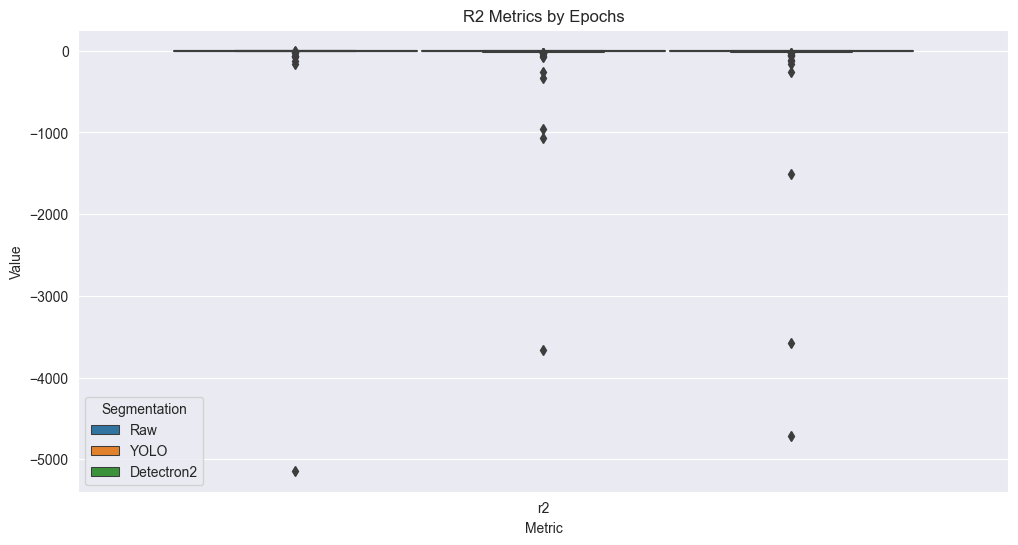

In [110]:
deeplearningresults = {}

with open('resultsDeepLearningC.json') as json_file:
    deeplearningresults = json.load(json_file)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = deeplearningresults

def flatten_json(d, keys=None):
    if keys is None:
        keys = []
    if isinstance(d, type(dict)):
        for k, v in d.items():
            for item in flatten_json(v, keys + [k]):
                yield item
    else:
        yield keys + [d]

print(data)

flat_data = list(flatten_json(data))

print(flat_data)
df = pd.DataFrame(flat_data, columns=["Segmentation", "" ,"Dataset","Model","Epochs", "Metric", "Value"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Segmentation", data=df[df["Metric"] == "r2"])

#sns.barplot(x="Metric", y="Value", hue="Model", data=df[df["Metric"] == "r2"])
plt.title("R2 Metrics by Epochs")
plt.show()


In [26]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap8(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2 values

    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if(dataset_name[::-1][1] == fruitInitial):
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            print(epoch_data)
                            data.append([dataset_name + '-' +  model_name + '-' + epoch, epoch_data['mse']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2'],
                                'MSE' : epoch_data['mse'],
                                'MAE' : epoch_data['mae'],
                                'RMSE' : epoch_data['rmse']


                            })
    #print(r2_data)

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 values and R2 rank values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_r2_rank = pd.pivot_table(r2_df, values='r2_rank', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize':(x,y)}) #resultsML 8,6 resultsDL 12,13

    ax = sns.heatmap(pivot_table_r2_rank, cmap="YlGnBu", annot=pivot_table_r2, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2 Rank'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'))
    ax.set_title("R2 Comparison by Model and Epochs")
    
    # Set the xlabel based on the epoch number
    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        ax.set_xlabel("Model and Epochs")
    else:
        ax.set_xlabel("Model")
    
    ax.set_ylabel("Segmentation model and Data features")

    # Rotate the x-axis labels to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ensure the heatmap is fully displayed
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    return data


{'r2': 0.9853256207471913, 'loss': None, 'mse': 0.0067148793736774735, 'mae': 0.0677157837923443, 'rmse': 0.08194436755309954}
{'r2': 0.9779571449284651, 'loss': None, 'mse': 0.004318405991816957, 'mae': 0.044067504782681066, 'rmse': 0.06571457975074448}
{'r2': 0.9824953995479875, 'loss': None, 'mse': 0.01038975559232157, 'mae': 0.06959509389295418, 'rmse': 0.10193015055576819}
{'r2': 0.9851861959998056, 'loss': None, 'mse': 0.006610425758366549, 'mae': 0.062451356213414765, 'rmse': 0.08130452483328679}
{'r2': 0.9804995425504345, 'loss': None, 'mse': 0.0066091513284690356, 'mae': 0.06501411286294902, 'rmse': 0.08129668706945588}
{'r2': 0.9592813074499945, 'loss': None, 'mse': 0.020150420493792332, 'mae': 0.09444296205199539, 'rmse': 0.1419521767842689}
  experiment        test_name dataset_name model_name epoch        r2  \
0        Raw  MachineLearning         CGBR     linear     1  0.985326   
1        Raw  MachineLearning         CGBR        SVR     1  0.977957   
2       YOLO  Mach

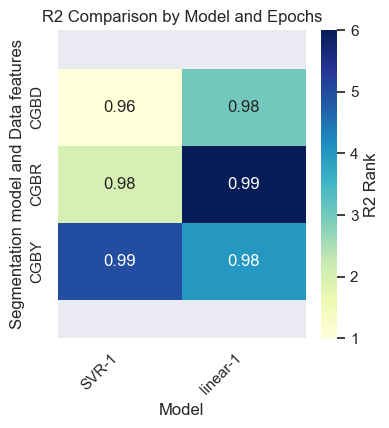

In [27]:
aa = plot_r2_heatmap8(resultsML, 'B', 4,4)


In [28]:
import seaborn as sns
import pandas as pd
import numpy as np

def plot_r2_heatmap9(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2, MSE, MAE, and RMSE values

    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if dataset_name[::-1][1] == fruitInitial:
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            data.append([dataset_name + '-' + model_name + '-' + epoch, epoch_data['mse']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2'],
                                'MSE': epoch_data['mse'],
                                'MAE': epoch_data['mae'],
                                'RMSE': epoch_data['rmse']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 and RMSE values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])
    pivot_table_rmse = pd.pivot_table(r2_df, values='RMSE', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize': (x, y)})

    ax = sns.heatmap(pivot_table_r2, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'))
    ax.set_title("R2 Comparison by Model and Epochs")

    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        ax.set_xlabel("Model and Epochs")
    else:
        ax.set_xlabel("Model")

    ax.set_ylabel("Segmentation model and Data features")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    # Create the additional heatmap for RMSE values
    sns.set(rc={'figure.figsize': (x, y)})

    ax_rmse = sns.heatmap(pivot_table_rmse, cmap="YlOrRd", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'RMSE'}, yticklabels=pivot_table_rmse.index.get_level_values('dataset_name'))
    ax_rmse.set_title("RMSE Comparison by Model and Epochs")

    if any(int(epoch) > 1 for epoch in pivot_table_rmse.columns.get_level_values('epoch')):
        ax_rmse.set_xlabel("Model and Epochs")
    else:
        ax_rmse.set_xlabel("Model")

    ax_rmse.set_ylabel("Segmentation model and Data features")

    ax_rmse.set_xticklabels(ax_rmse.get_xticklabels(), rotation=45, horizontalalignment='right')

    bottom_rmse, top_rmse = ax_rmse.get_ylim()
    ax_rmse.set_ylim(bottom_rmse + 0.5, top_rmse - 0.5)

    return data


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_r2_heatmap10(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2, MSE, MAE, and RMSE values

    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if dataset_name[::-1][1] == fruitInitial:
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            data.append([dataset_name + '-' + model_name + '-' + epoch, epoch_data['mse']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2'],
                                'MSE': epoch_data['mse'],
                                'MAE': epoch_data['mae'],
                                'RMSE': epoch_data['rmse']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap for R2 values
    fig, ax = plt.subplots()
    sns.set(font_scale=1.2)
    sns.set(rc={'figure.figsize': (x, y)})

    sns.heatmap(pivot_table_r2, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'R2'}, yticklabels=pivot_table_r2.index.get_level_values('dataset_name'), ax=ax)
    ax.set_title("R2 Comparison by Model and Epochs")

    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        ax.set_xlabel("Model and Epochs")
    else:
        ax.set_xlabel("Model")

    ax.set_ylabel("Segmentation model and Data features")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    # Create a pivot table with the RMSE values
    pivot_table_rmse = pd.pivot_table(r2_df, values='RMSE', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create the heatmap for RMSE values
    fig_rmse, ax_rmse = plt.subplots()
    sns.set(rc={'figure.figsize': (x, y)})

    sns.heatmap(pivot_table_rmse, cmap="YlOrRd", annot=True, fmt=".2f", annot_kws={"size": 12}, cbar_kws={'label': 'RMSE'}, yticklabels=pivot_table_rmse.index.get_level_values('dataset_name'), ax=ax_rmse)
    ax_rmse.set_title("RMSE Comparison by Model and Epochs")

    if any(int(epoch) > 1 for epoch in pivot_table_rmse.columns.get_level_values('epoch')):
        ax_rmse.set_xlabel("Model and Epochs")
    else:
        ax_rmse.set_xlabel("Model")

    ax_rmse.set_ylabel("Segmentation model and Data features")

    ax_rmse.set_xticklabels(ax_rmse.get_xticklabels(), rotation=45, horizontalalignment='right')

    bottom_rmse, top_rmse = ax_rmse.get_ylim()
    ax_rmse.set_ylim(bottom_rmse + 0.5, top_rmse - 0.5)

    return data



  experiment        test_name dataset_name model_name epoch        r2  \
0        Raw  MachineLearning         CGBR     linear     1  0.985326   
1        Raw  MachineLearning         CGBR        SVR     1  0.977957   
2       YOLO  MachineLearning         CGBY     linear     1  0.982495   

        MSE       MAE      RMSE  r2_rank  
0  0.006715  0.067716  0.081944      6.0  
1  0.004318  0.044068  0.065715      2.0  
2  0.010390  0.069595  0.101930      4.0  


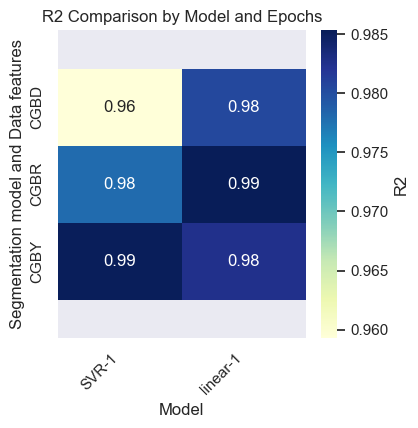

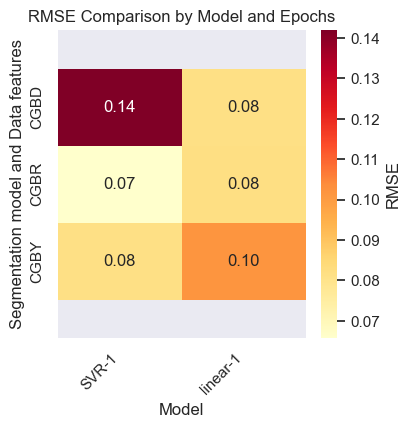

In [31]:
aa = plot_r2_heatmap10(resultsML, 'B', 4,4)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_r2_heatmap12(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2, MSE, MAE, and RMSE values
    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if dataset_name[::-1][1] == fruitInitial:
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            data.append([dataset_name + '-' + model_name + '-' + epoch, epoch_data['mse']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2'],
                                'MSE': epoch_data['mse'],
                                'MAE': epoch_data['mae'],
                                'RMSE': epoch_data['rmse']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create a pivot table with the R2 values
    pivot_table_r2 = pd.pivot_table(r2_df, values='r2', index=['experiment', 'test_name', 'dataset_name'], columns=['model_name', 'epoch'])

    # Create a bar plot for RMSE values
    fig_rmse, ax_rmse = plt.subplots()
    sns.set(rc={'figure.figsize': (x, y)})

    sorted_rmse = r2_df.sort_values(by=['RMSE'])
    if any(int(epoch) > 1 for epoch in pivot_table_r2.columns.get_level_values('epoch')):
        sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=sorted_rmse, ci=None, ax=ax_rmse)
        ax_rmse.set_xlabel("RMSE")
    else:
        sns.barplot(x='RMSE', y='dataset_name', data=sorted_rmse, ci=None, ax=ax_rmse)
        ax_rmse.set_xlabel("RMSE")




    ax_rmse.set_ylabel("Segmentation model and Data features")
    ax_rmse.set_yticklabels(ax_rmse.get_yticklabels(), rotation=45, horizontalalignment='right')

    bottom_rmse, top_rmse = ax_rmse.get_ylim()
    ax_rmse.set_ylim(bottom_rmse + 0.5, top_rmse - 0.5)

    return data



In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_r2_barplot13(results_dict, fruitInitial, x, y):
    # Create a pandas dataframe with the R2, MSE, MAE, and RMSE values
    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                if dataset_name[::-1][1] == fruitInitial:
                    for model_name, model_data in dataset_data.items():
                        for epoch, epoch_data in model_data.items():
                            data.append([dataset_name + '-' + model_name + '-' + epoch, epoch_data['r2']])
                            r2_data.append({
                                'experiment': experiment,
                                'test_name': test_name,
                                'dataset_name': dataset_name,
                                'model_name': model_name,
                                'epoch': epoch,
                                'r2': epoch_data['r2'],
                                'MSE': epoch_data['mse'],
                                'MAE': epoch_data['mae'],
                                'RMSE': epoch_data['rmse']
                            })

    r2_df = pd.DataFrame(r2_data)

    # Rank the 'r2' values and add a new column 'r2_rank'
    r2_df['r2_rank'] = r2_df['r2'].rank()

    r2_df.sort_values(by=['r2'])

    print(r2_df.head(3))

    # Create bar plots for RMSE values for each model
    for model in r2_df['model_name'].unique():
        fig, ax = plt.subplots()
        sns.set(rc={'figure.figsize': (x, y)})

        model_rmse_data = r2_df[r2_df['model_name'] == model].sort_values(by=['RMSE'])
        if any(int(epoch) > 1 for epoch in model_rmse_data['epoch']):
            sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
            ax.set_xlabel("RMSE")
        else:
            sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)
            ax.set_xlabel("RMSE")

        ax.set_ylabel("Segmentation model and Data features")
        ax.set_title(f"RMSE Comparison - Model: {model}")

    plt.show()


  experiment        test_name dataset_name model_name epoch        r2  \
0        Raw  MachineLearning         CGBR     linear     1  0.985326   
1        Raw  MachineLearning         CGBR        SVR     1  0.977957   
2       YOLO  MachineLearning         CGBY     linear     1  0.982495   

        MSE       MAE      RMSE  r2_rank  
0  0.006715  0.067716  0.081944      6.0  
1  0.004318  0.044068  0.065715      2.0  
2  0.010390  0.069595  0.101930      4.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)


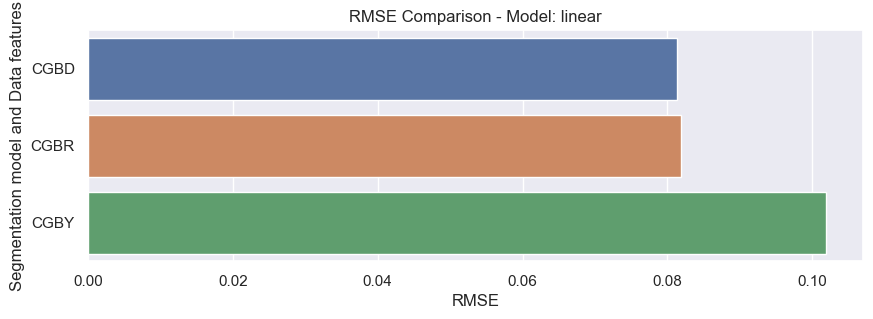

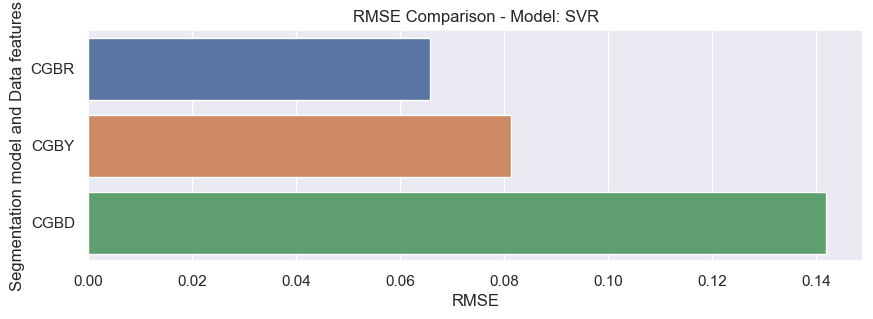

  experiment        test_name dataset_name model_name epoch        r2  \
0        Raw  MachineLearning         CGRR     linear     1  0.485427   
1        Raw  MachineLearning         CGRR        SVR     1  0.572087   
2       YOLO  MachineLearning         CGRY     linear     1  0.499399   

        MSE       MAE      RMSE  r2_rank  
0  0.317252  0.445391  0.563251      2.0  
1  0.241998  0.357356  0.491933      5.0  
2  0.285388  0.417376  0.534217      3.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)


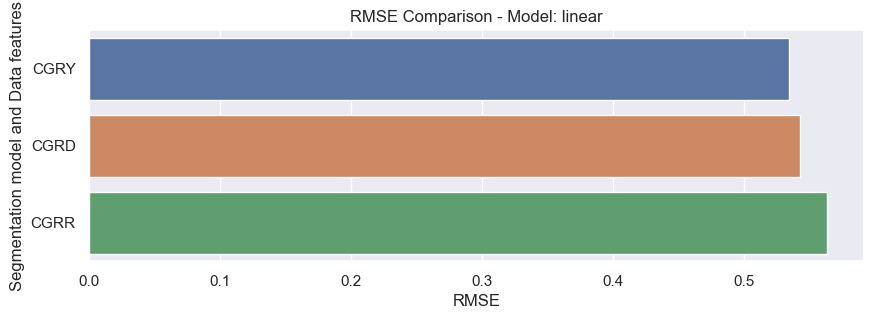

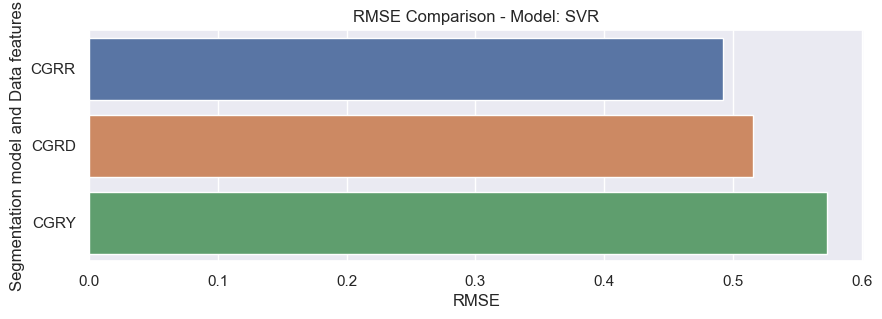

  experiment        test_name dataset_name model_name epoch        r2  \
0        Raw  MachineLearning         CGSR     linear     1  0.921792   
1        Raw  MachineLearning         CGSR        SVR     1  0.963203   
2       YOLO  MachineLearning         CGSY     linear     1  0.959239   

        MSE       MAE      RMSE  r2_rank  
0  4.977966  1.513074  2.231136      2.0  
1  3.126686  1.105139  1.768244      6.0  
2  3.550254  1.279047  1.884212      5.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', data=model_rmse_data, ci=None, ax=ax)


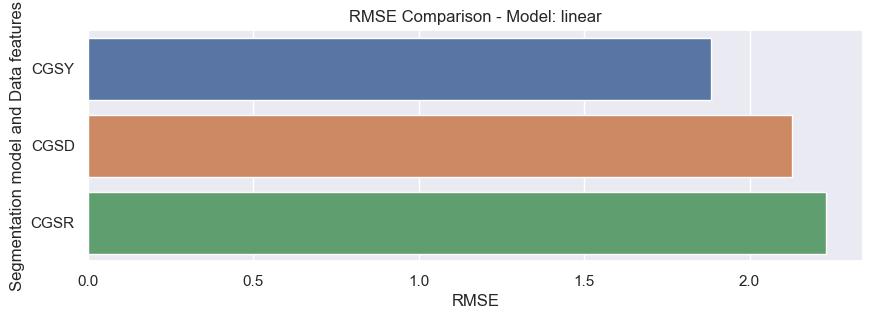

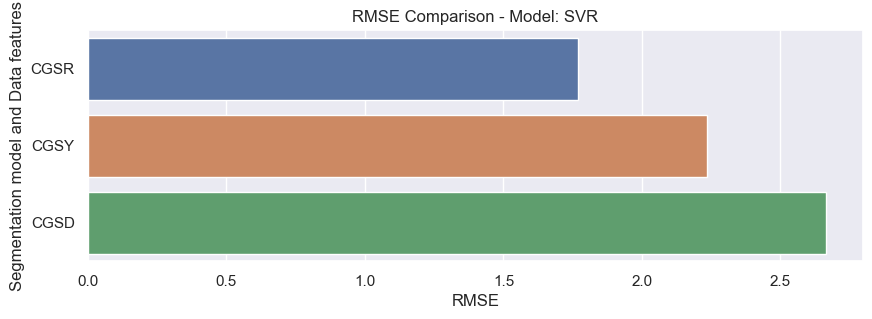

In [37]:
aa = plot_r2_barplot13(resultsML, 'B', 10,3)
aa = plot_r2_barplot13(resultsML, 'R', 10,3)
aa = plot_r2_barplot13(resultsML, 'S', 10,3)

  experiment     test_name dataset_name model_name epoch          r2  \
0        Raw  DeepLearning         CGBR        MLP   100  -64.701840   
1        Raw  DeepLearning         CGBR        MLP   500 -119.533028   
2        Raw  DeepLearning         CGBR       FCNN   100   -5.386048   

         MSE       MAE      RMSE  r2_rank  
0  18.549576  4.267222  4.306922     15.0  
1  85.447159  9.205338  9.243763      8.0  
2   2.576350  1.314125  1.605101     31.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


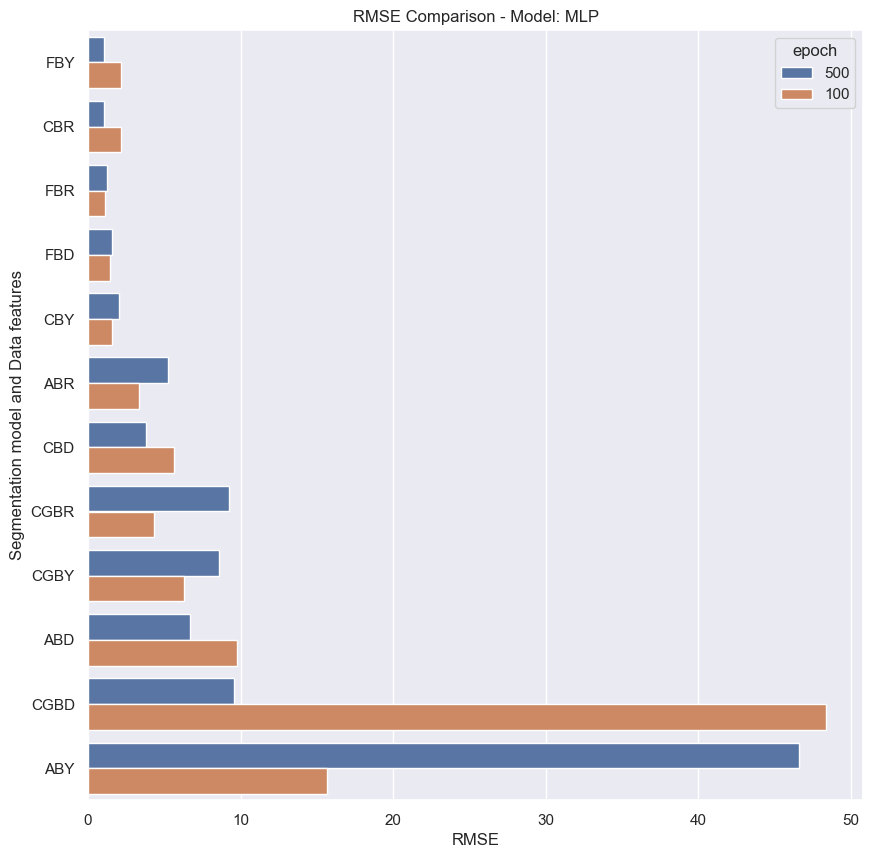

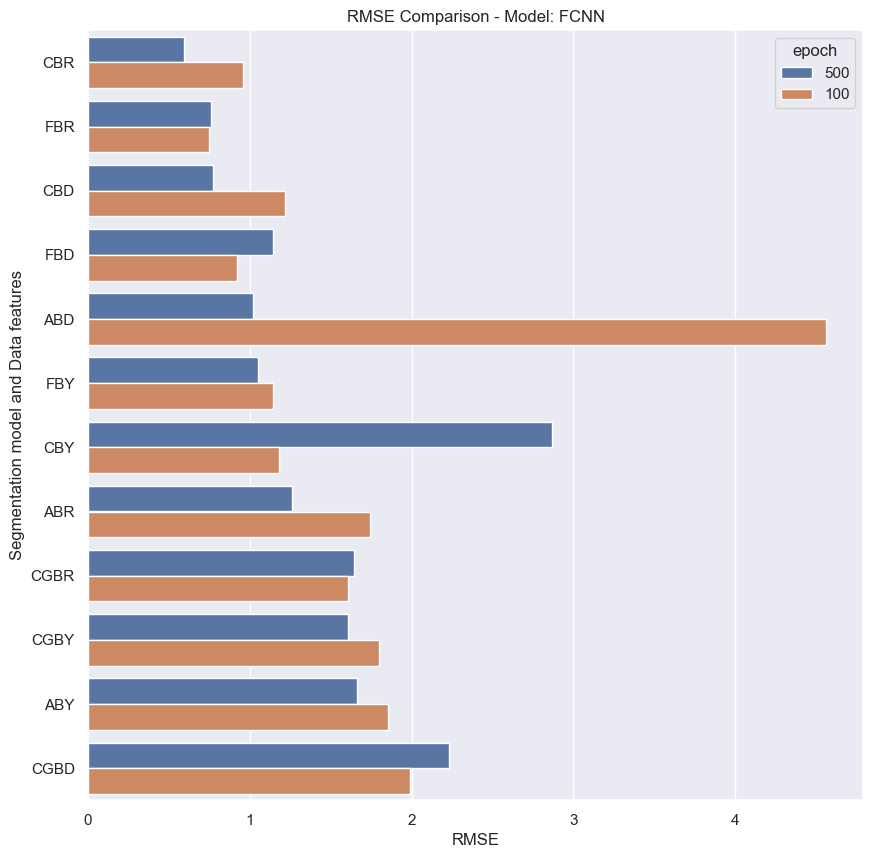

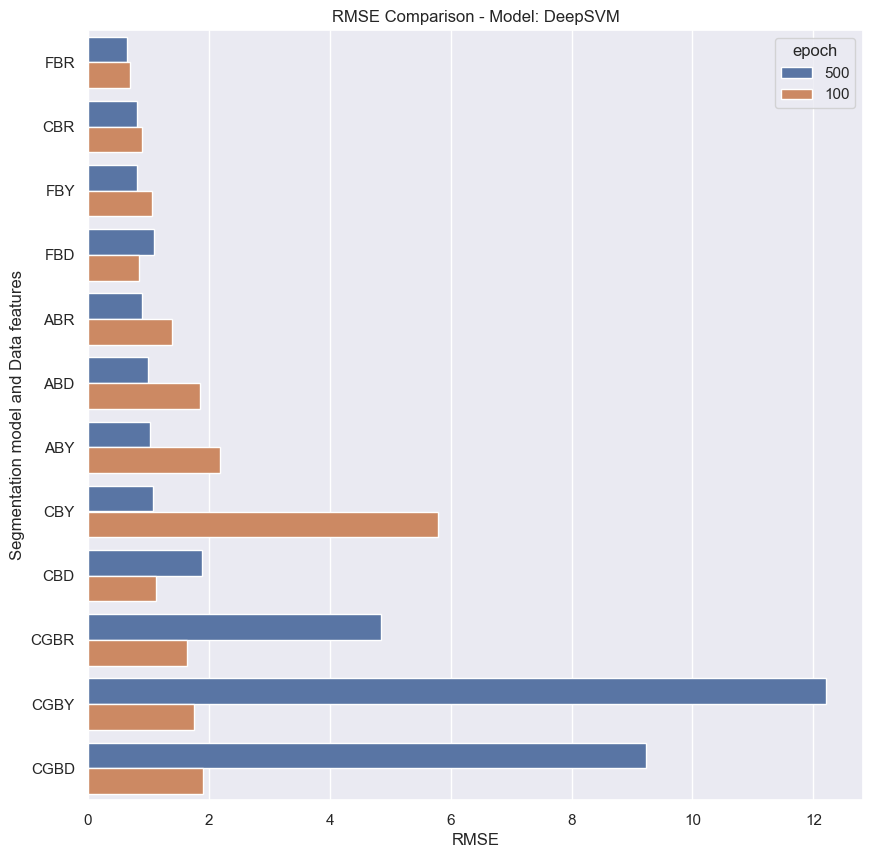

  experiment     test_name dataset_name model_name epoch           r2  \
0        Raw  DeepLearning         CGRR        MLP   100    -5.561486   
1        Raw  DeepLearning         CGRR        MLP   500 -5140.528238   
2        Raw  DeepLearning         CGRR       FCNN   100     0.418348   

           MSE        MAE       RMSE  r2_rank  
0     4.712158   2.081551   2.170751     13.0  
1  3032.463623  54.401215  55.067810      1.0  
2     0.357158   0.479005   0.597627     64.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


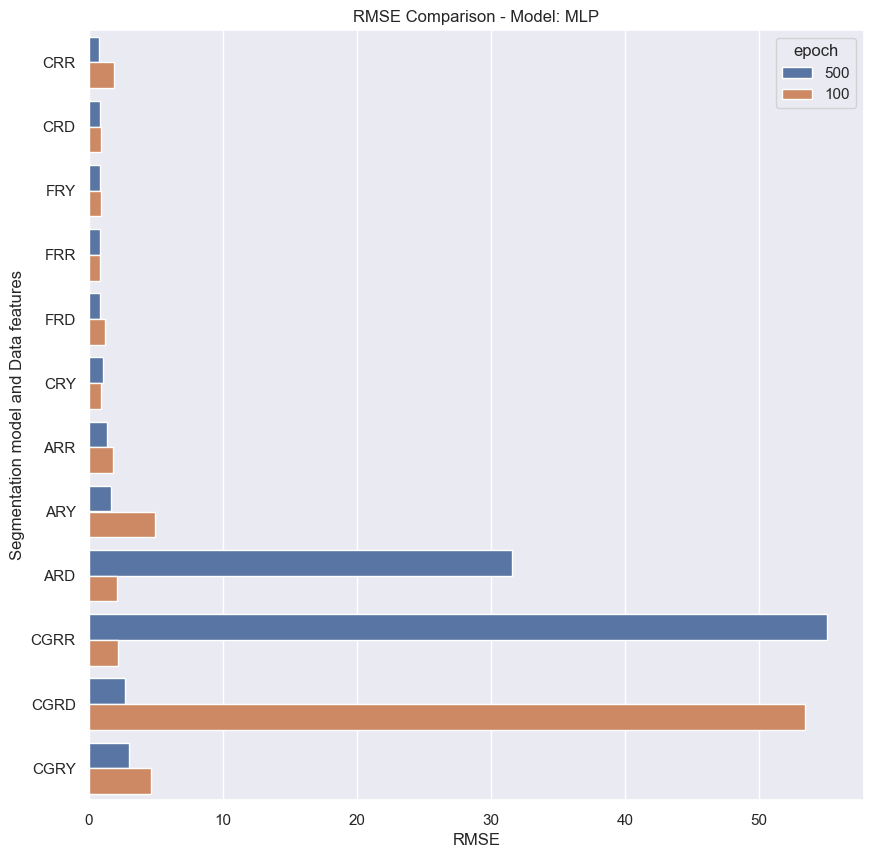

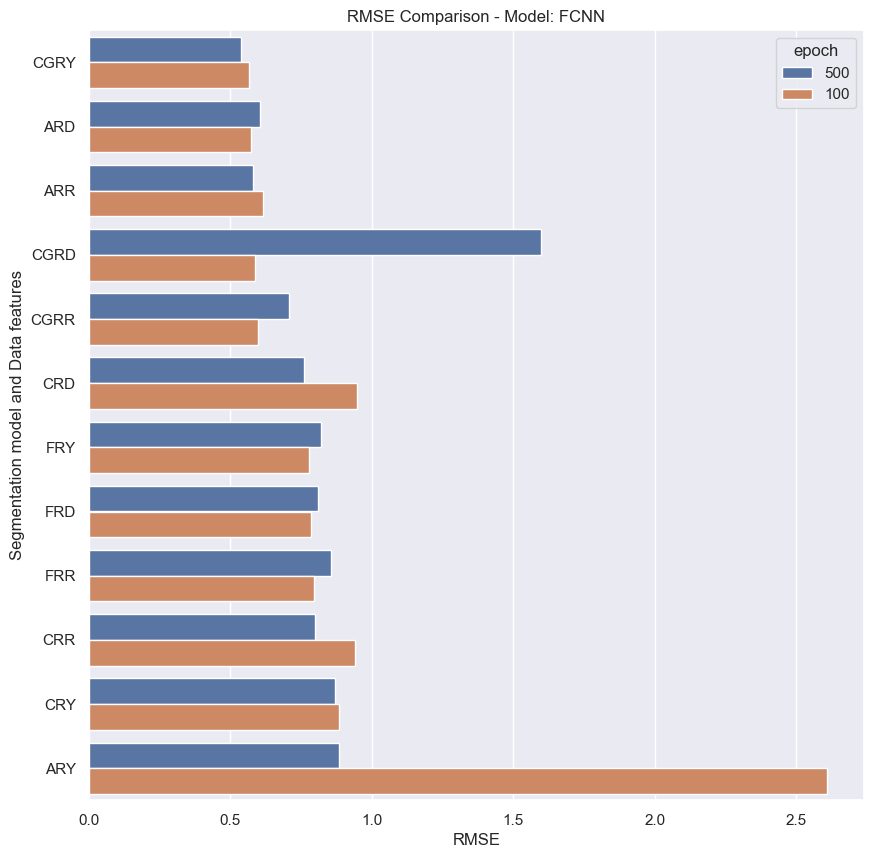

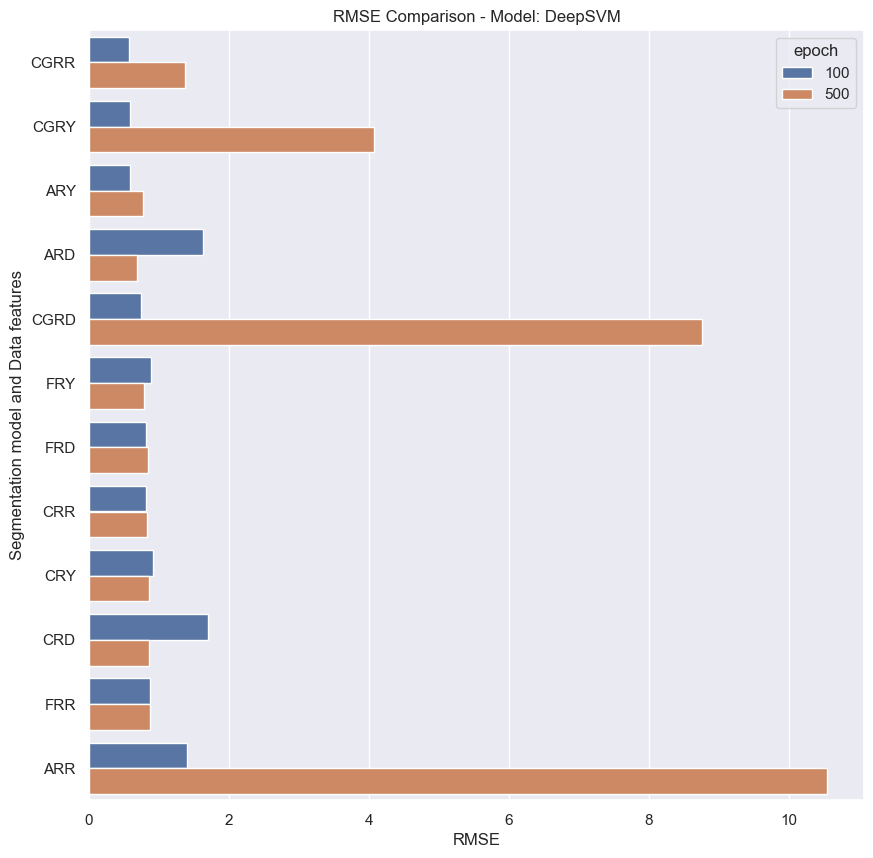

  experiment     test_name dataset_name model_name epoch        r2        MSE  \
0        Raw  DeepLearning         CGSR        MLP   100 -0.073272  72.312508   
1        Raw  DeepLearning         CGSR        MLP   500  0.207442  62.151470   
2        Raw  DeepLearning         CGSR       FCNN   100  0.952713   3.495213   

        MAE      RMSE  r2_rank  
0  7.645982  8.503676     28.0  
1  6.870270  7.883620     54.0  
2  1.476641  1.869549     70.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


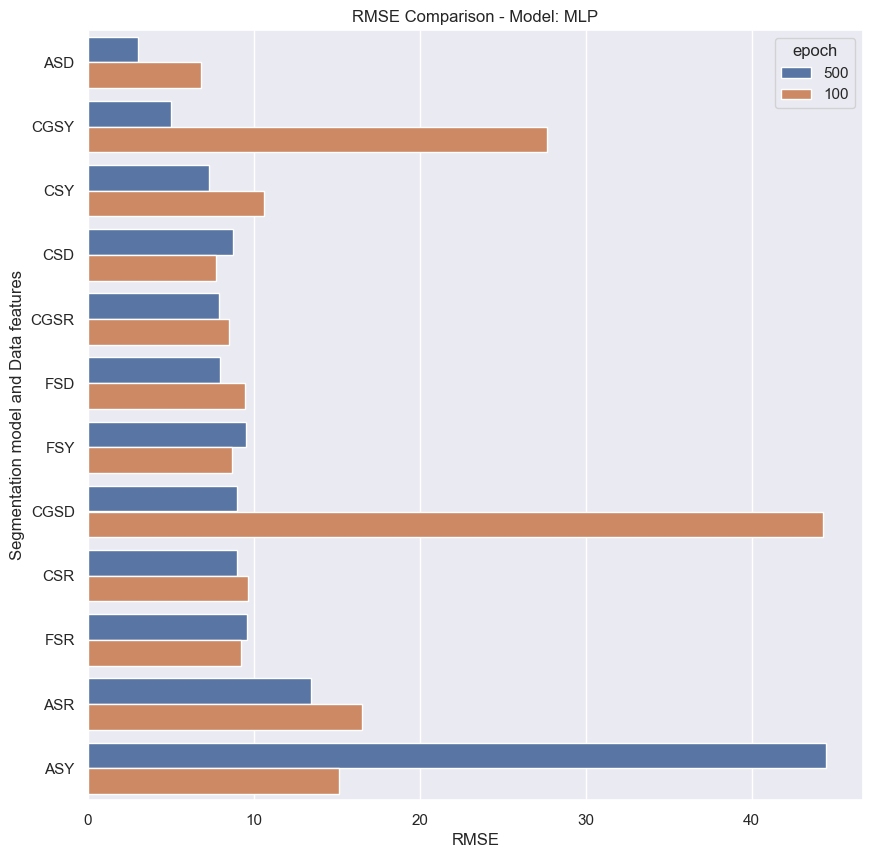

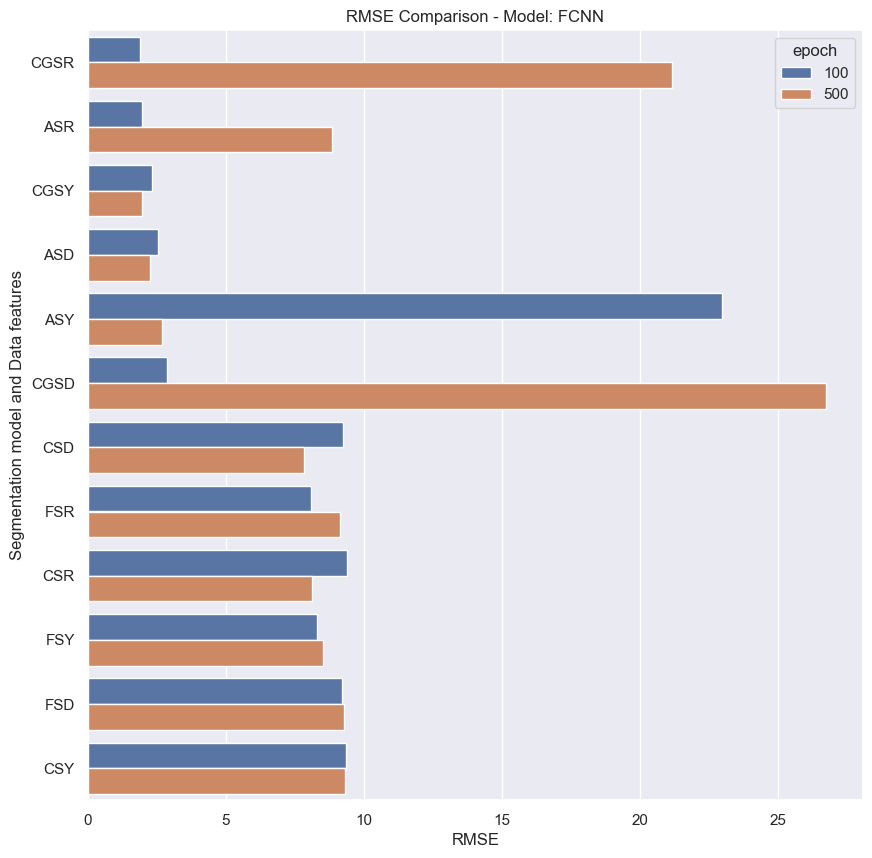

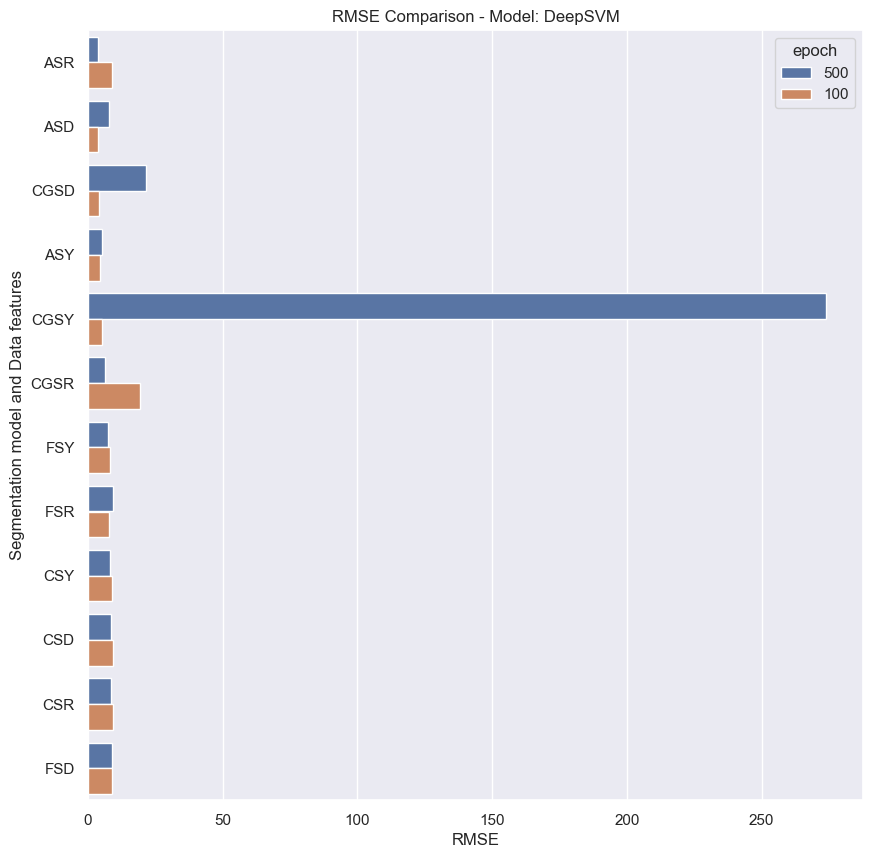

In [32]:
aa = plot_r2_barplot13(resultsDL, 'B', 10,10)
aa = plot_r2_barplot13(resultsDL, 'R', 10,10)
aa = plot_r2_barplot13(resultsDL, 'S', 10,10)

  experiment test_name dataset_name model_name epoch        r2       MSE  \
0        Raw    Images         CIBR        CNN   100 -0.004041  0.425821   
1        Raw    Images         CIBR        CNN   300 -0.286355  0.319515   
2        Raw    Images         CIBR   DenseNet   100 -0.444931  1.041139   

        MAE      RMSE  r2_rank  
0  0.497408  0.652549     16.0  
1  0.449283  0.565257     14.0  
2  0.864502  1.020362     11.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


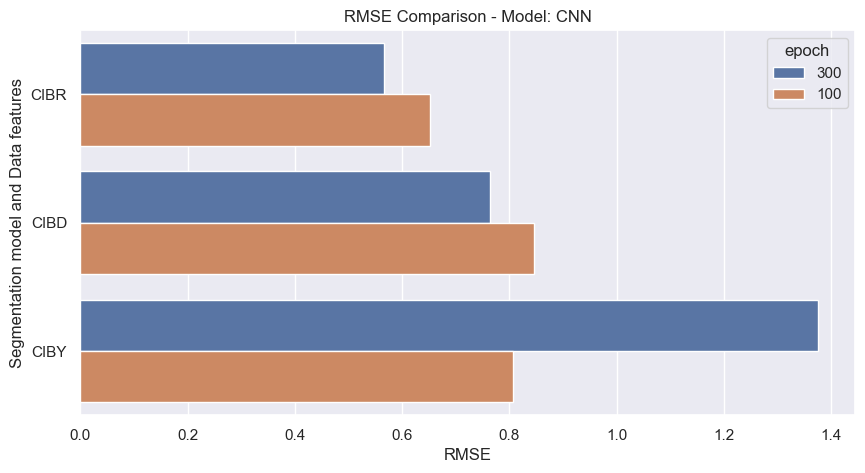

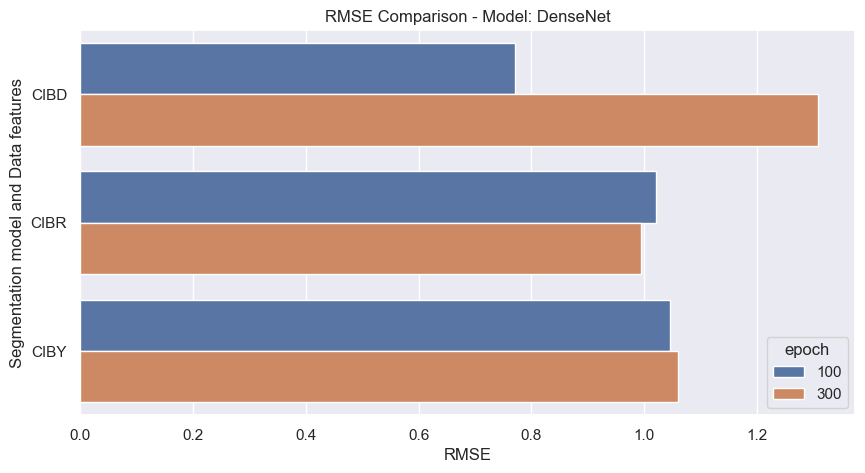

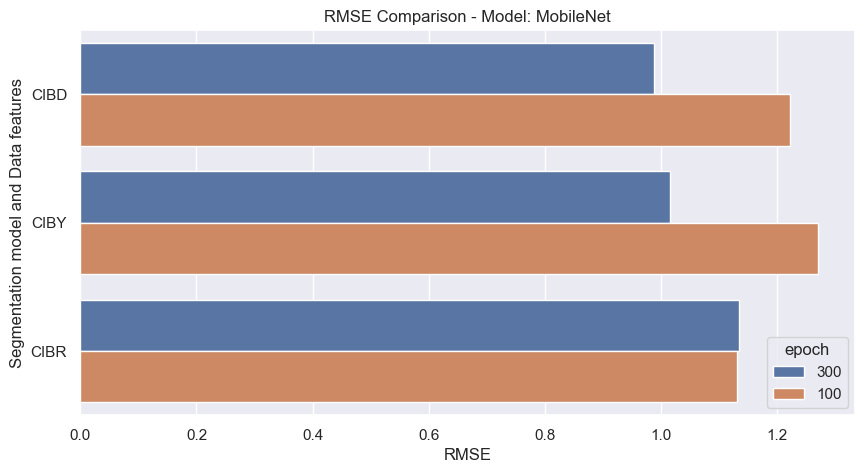

  experiment test_name dataset_name model_name epoch        r2       MSE  \
0        Raw    Images         CIRR        CNN   100 -0.007139  0.715076   
1        Raw    Images         CIRR        CNN   300 -0.004507  0.596971   
2        Raw    Images         CIRR   DenseNet   100 -0.147463  0.771115   

        MAE      RMSE  r2_rank  
0  0.709848  0.845622     15.0  
1  0.644525  0.772639     16.0  
2  0.643308  0.878131     12.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


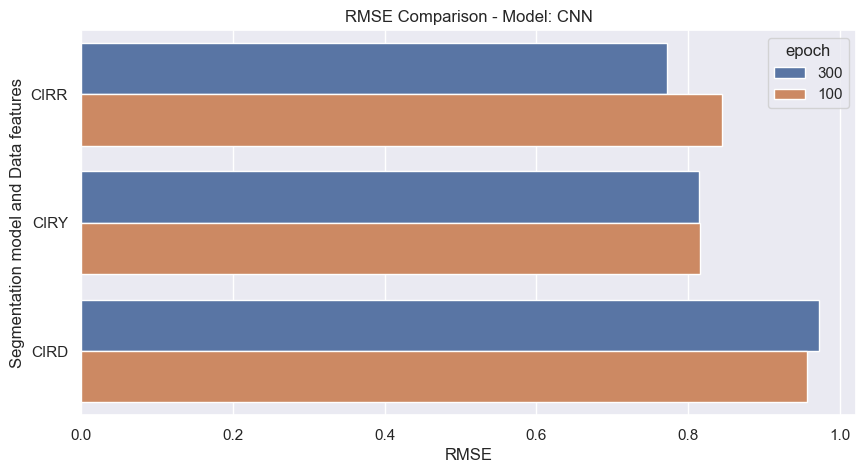

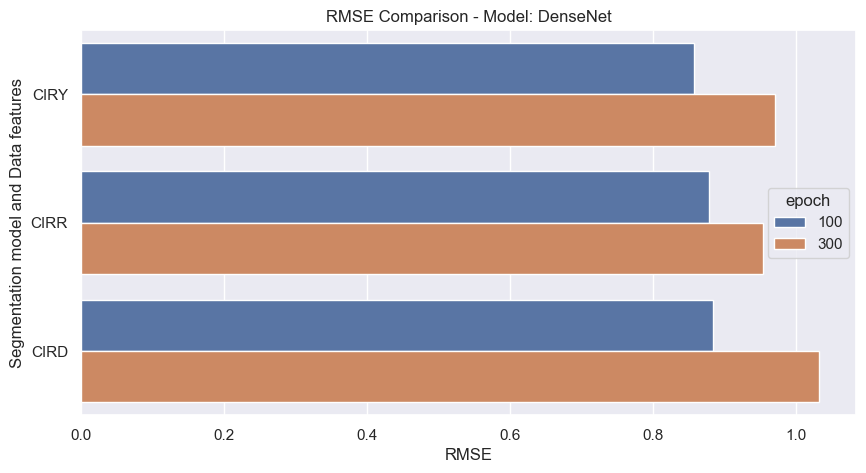

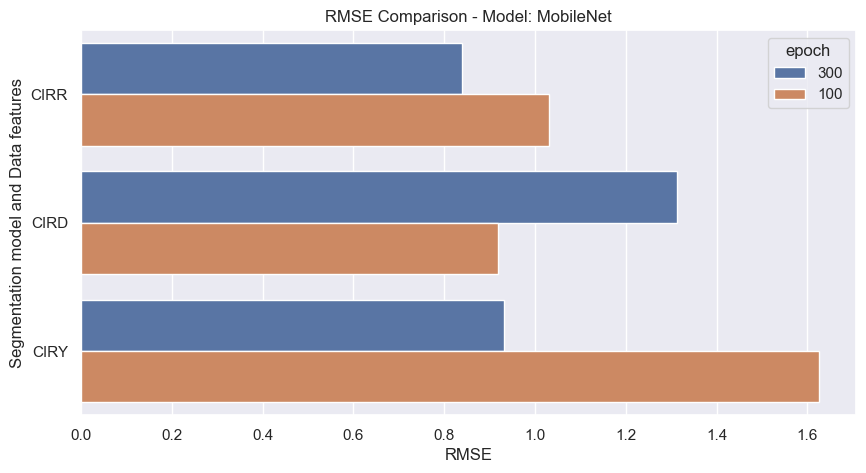

  experiment test_name dataset_name model_name epoch        r2        MSE  \
0        Raw    Images         CISR        CNN   100 -0.008425  94.895233   
1        Raw    Images         CISR        CNN   300 -0.343561  93.732430   
2        Raw    Images         CISR   DenseNet   100  0.541273  31.607140   

        MAE      RMSE  r2_rank  
0  8.301085  9.741419      4.0  
1  7.425037  9.681551      3.0  
2  4.217607  5.622023     12.0  


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)
/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_6061/1129911199.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE', y='dataset_name', hue='epoch', data=model_rmse_data, ci=None, ax=ax)


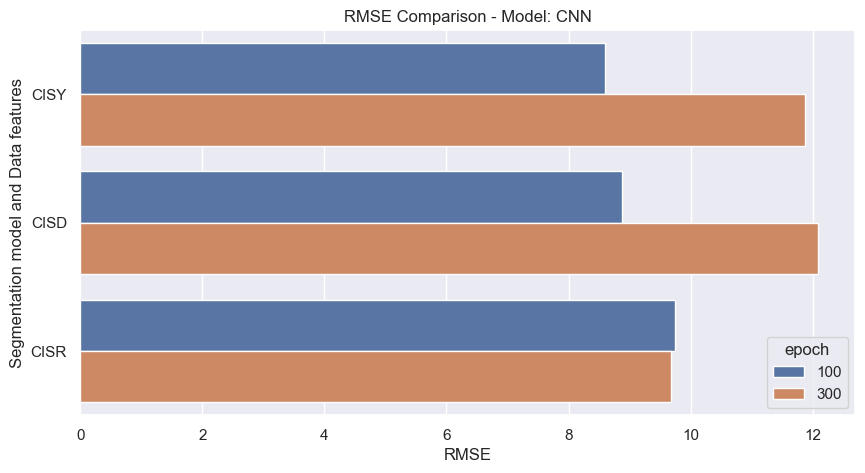

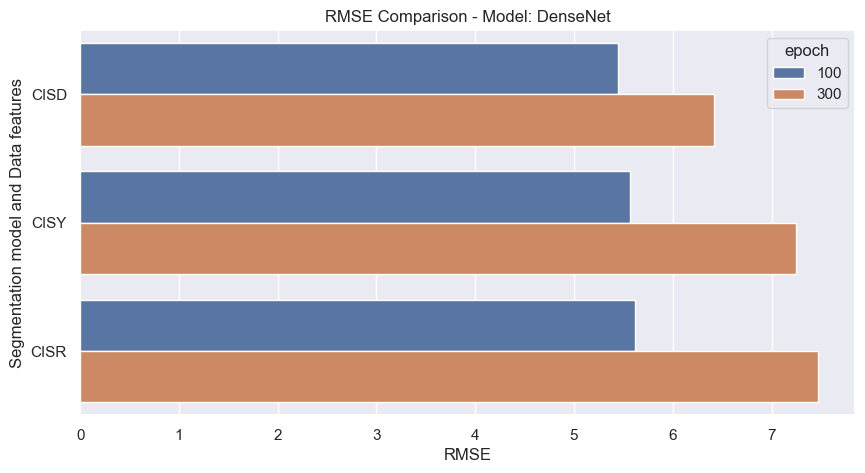

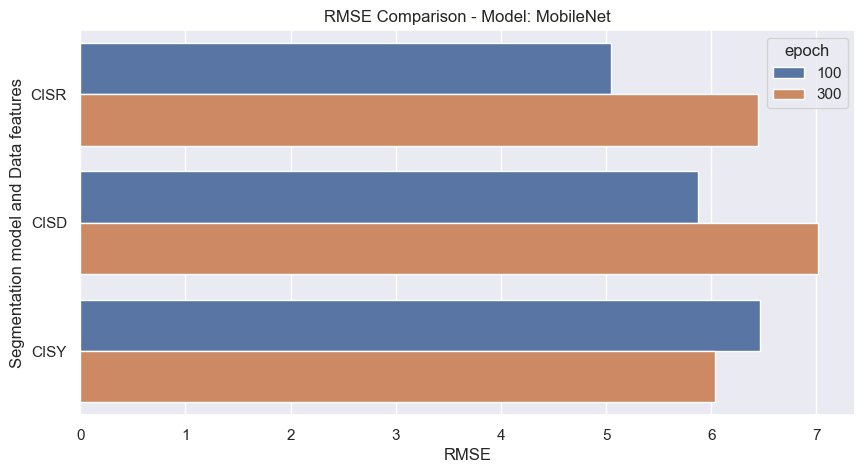

In [40]:
aa = plot_r2_barplot13(resultsCNN, 'B', 10,5)
aa = plot_r2_barplot13(resultsCNN, 'R', 10,5)
aa = plot_r2_barplot13(resultsCNN, 'S', 10,5)

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_quartiles(results_dict):
    # Create a list to store the correlation values
    correlation_values = []

    # Extract the correlation values from the results dictionary
    for experiment_data in results_dict.values():
        for correlation_value in experiment_data.values():
            correlation_values.append(correlation_value)

    # Check if there are enough correlation values to divide into quartiles
    print(len(correlation_values))
    print(correlation_values)
    if len(correlation_values) < 4:
        print("Not enough correlation values to divide into quartiles.")
        return

    # Divide the correlation values into quartiles
    quartiles = np.array_split(correlation_values, 4)

    # Create subplots for the quartiles
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Correlation Quartiles')

    # Plot each quartile in a separate subplot
    for i in range(2):
        for j in range(2):
            if len(quartiles[i * 2 + j]) > 0:
                axs[i, j].hist(quartiles[i * 2 + j])
                axs[i, j].set_title(f'Quartile {i * 2 + j + 1}')
                axs[i, j].set_xlabel('Correlation')
                axs[i, j].set_ylabel('Frequency')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def extractdata(results_dict, fruitInitial):
    data = []
    r2_data = []
    for experiment, experiment_data in results_dict.items():
        for test_name, test_data in experiment_data.items():
            for dataset_name, dataset_data in test_data.items():
                #if dataset_name[::-1][1] == fruitInitial:
                for model_name, model_data in dataset_data.items():
                    for epoch, epoch_data in model_data.items():
                        data.append([dataset_name + '-' + model_name + '-' + epoch, epoch_data['r2']])
    #print(data)
    return data



In [75]:
merged_dict = {**resultsCNN, **resultsDL, **resultsML}

print(len(merged_dict))
data = extractdata(merged_dict, 'B')

print(len(data))

plot_quartiles(merged_dict)

3
18
3
[{'CGBR': {'linear': {'1': {'r2': 0.9853256207471913, 'loss': None, 'mse': 0.0067148793736774735, 'mae': 0.0677157837923443, 'rmse': 0.08194436755309954}}, 'SVR': {'1': {'r2': 0.9779571449284651, 'loss': None, 'mse': 0.004318405991816957, 'mae': 0.044067504782681066, 'rmse': 0.06571457975074448}}}, 'CGRR': {'linear': {'1': {'r2': 0.48542676329732015, 'loss': None, 'mse': 0.31725169729176644, 'mae': 0.44539110251103653, 'rmse': 0.5632510073597441}}, 'SVR': {'1': {'r2': 0.5720874747977521, 'loss': None, 'mse': 0.24199844779564256, 'mae': 0.3573564447088807, 'rmse': 0.4919333773953975}}}, 'CGSR': {'linear': {'1': {'r2': 0.9217923962441629, 'loss': None, 'mse': 4.977966100817252, 'mae': 1.5130742999634992, 'rmse': 2.2311356078950584}}, 'SVR': {'1': {'r2': 0.9632027766646506, 'loss': None, 'mse': 3.1266857052551833, 'mae': 1.1051393672055243, 'rmse': 1.7682436781323956}}}}, {'CGBY': {'linear': {'1': {'r2': 0.9824953995479875, 'loss': None, 'mse': 0.01038975559232157, 'mae': 0.0695950